<center><h1>1-ab: Introduction to Neural Networks</h1></center>

<center><h2><a href="https://rdfia.github.io/">Course link</a></h2></center>

# Warning :
# Do "File -> Save a copy in Drive" before you start modifying the notebook, otherwise your modifications will not be saved.


In [1]:
!wget https://github.com/rdfia/rdfia.github.io/raw/master/data/2-ab.zip
!unzip -j 2-ab.zip
!wget https://github.com/rdfia/rdfia.github.io/raw/master/code/2-ab/utils-data.py

--2023-09-27 16:27:23--  https://github.com/rdfia/rdfia.github.io/raw/master/data/2-ab.zip
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/2-ab.zip [following]
--2023-09-27 16:27:24--  https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/2-ab.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8002::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13423991 (13M) [application/zip]
Saving to: ‘2-ab.zip.1’

2-ab.zip.1          100%[===================>]  12.80M  18.8MB/s    in 0.7s    

2023-09-27 16:27:24 (18.8 MB/s) - ‘2-ab.zip.

In [ ]:
import math
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%run 'utils-data.py'

# Part 1 : Forward and backward passes "by hands"

In [27]:
def init_params(nx, nh, ny):
    """
    nx, nh, ny: integers
    nx : Taille de l'entrée
    nh : Taille de la sortie de la première couche cachée
    ny : Taille output de la dernière couche
    out params: dictionnary
    """
    params = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for Wh, Wy, bh, by

    # Initialize weights with a normal distribution (mean=0, std=0.3)
    params["Wh"] = torch.randn(nh, nx) * 0.3
    params["Wy"] = torch.randn(ny, nh) * 0.3
    
    # Initialize biases as zeros
    params["bh"] = torch.randn(nh)
    params["by"] = torch.randn(ny)

    ####################
    ##      END        #
    ####################
    return params


In [22]:
def forward(params, X):
    """
    params: dictionnary
    X: (n_batch, dimension)
    """
    bsize = X.size(0)
    nh = params["Wh"].size(0)
    ny = params["Wy"].size(0)
    outputs = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for X, htilde, h, ytilde, yhat

    outputs["X"] = X
    outputs["htilde"] = torch.mm(X, params["Wh"].t()) + params["bh"].repeat(bsize, 1)
    outputs["h"] = torch.tanh(outputs["htilde"])
    outputs["ytilde"] = torch.mm(outputs["h"], params["Wy"].t()) + params["by"].repeat(bsize, 1)
    outputs["yhat"] = torch.softmax(outputs["ytilde"], dim=0)

    ####################
    ##      END        #
    ####################

    return outputs["yhat"], outputs


In [23]:
def loss_accuracy(Yhat, Y):

    #####################
    ## Your code here  ##
    #####################

    # Compute the loss 
    L = - torch.mean(torch.sum(Y * torch.log(Yhat), dim=0), dim=-1)
    
    # Find the predicted class for each example
    _, indsYhat = torch.max(Yhat, 1)
    _, indsY = torch.max(Y, 1)
    
    # Compute the accuracy (rate of correct predictions)
    acc = torch.sum(indsYhat == indsY).item() / Y.size(0)

    ####################
    ##      END        #
    ####################

    return L, acc


In [24]:
def backward(params, outputs, Y):
    bsize = Y.shape[0]
    grads = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for Wy, Wh, by, bh

    grads["yhat"] = outputs['yhat'] - Y
    grads["Wy"] = torch.mm(grads["yhat"].t(), outputs["h"]) / bsize
    grads["by"] = torch.sum(grads["yhat"], dim=0).t() / bsize
    grads["htilde"] = torch.mm(grads["yhat"], params["Wy"]) * (1 - outputs["h"] ** 2)
    grads["Wh"] = torch.mm(grads["htilde"].t(), outputs["X"]) / bsize
    grads["bh"] = torch.sum(grads["htilde"]).t() / bsize

    ####################
    ##      END        #
    ####################
    return grads


In [25]:
def sgd(params, grads, eta):

    #####################
    ## Your code here  ##
    #####################
    # update the params values

    # Update parameters using SGD
    params["Wh"] -= eta * grads["Wh"]
    params["Wy"] -= eta * grads["Wy"]
    params["bh"] -= eta * grads["bh"]
    params["by"] -= eta * grads["by"]
    
    ####################
    ##      END        #
    ####################
    return params


## Global learning procedure "by hands"

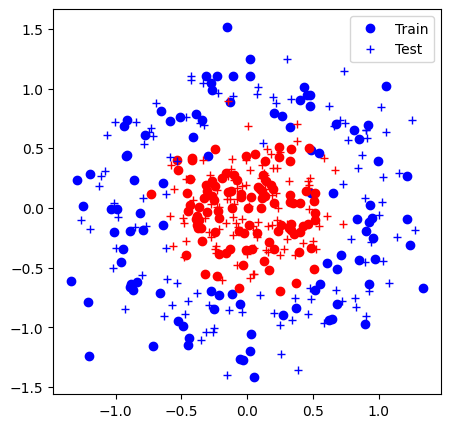

Iter 0: Acc train 0.5% (531.70), acc test 0.5% (532.15)


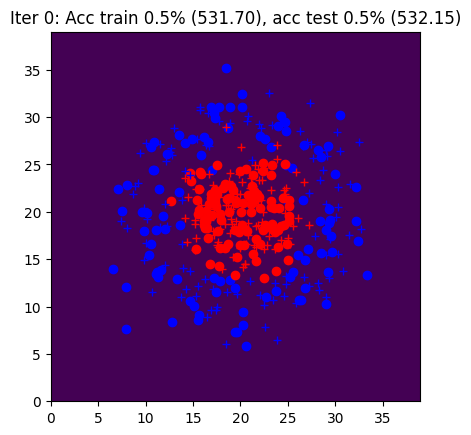

Iter 1: Acc train 0.5% (532.98), acc test 0.5% (533.53)


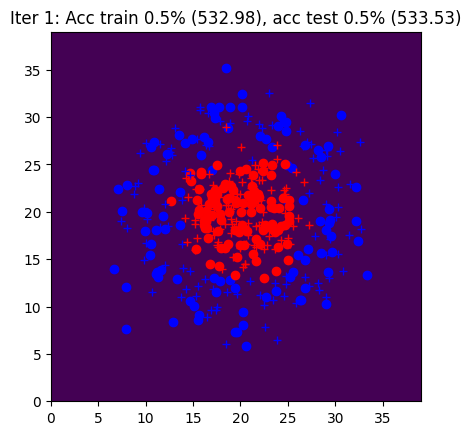

Iter 2: Acc train 0.5% (534.24), acc test 0.5% (534.83)


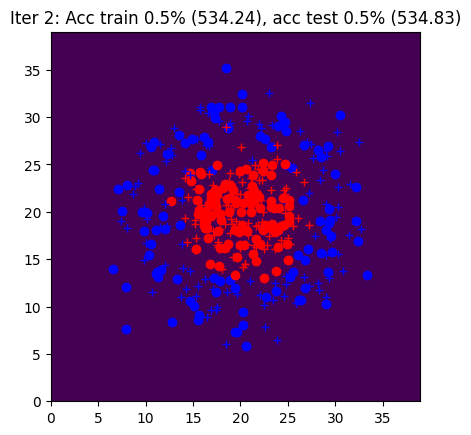

Iter 3: Acc train 0.5% (534.88), acc test 0.5% (535.44)


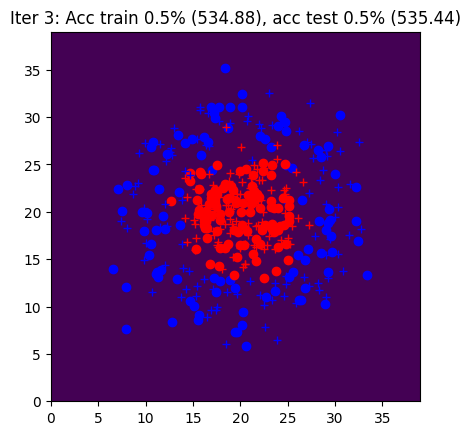

Iter 4: Acc train 0.5% (534.88), acc test 0.5% (535.38)


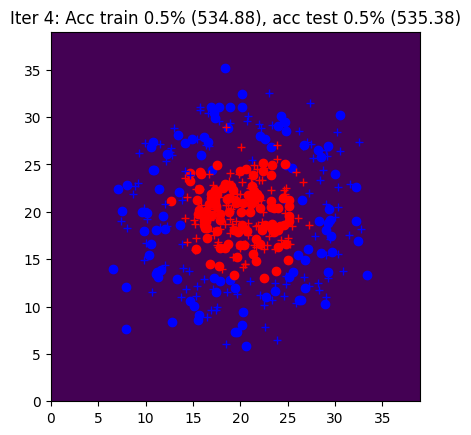

Iter 5: Acc train 0.5% (534.51), acc test 0.5% (534.94)


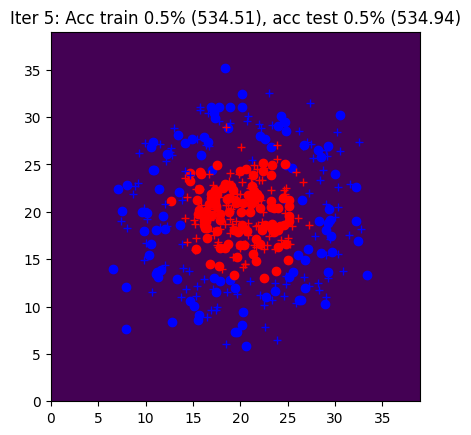

Iter 6: Acc train 0.5% (533.71), acc test 0.4% (534.08)


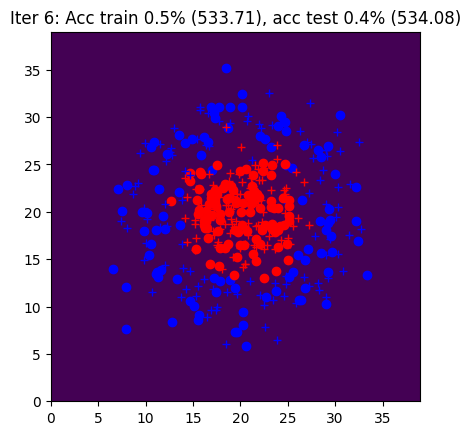

Iter 7: Acc train 0.5% (532.76), acc test 0.4% (533.06)


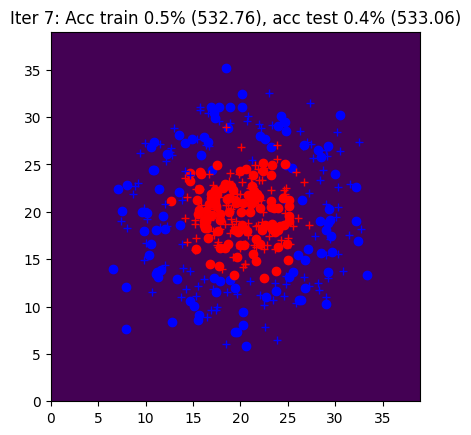

Iter 8: Acc train 0.5% (532.13), acc test 0.5% (532.41)


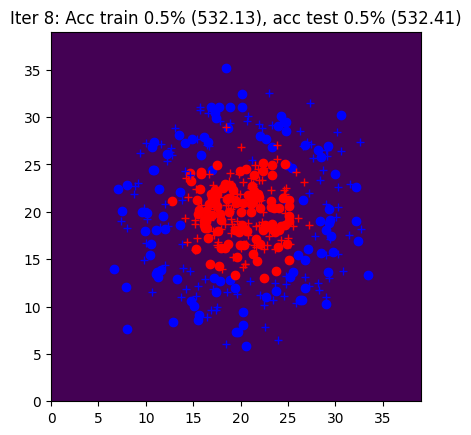

Iter 9: Acc train 0.5% (531.48), acc test 0.5% (531.72)


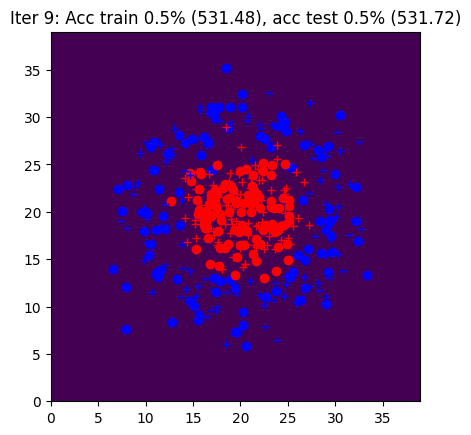

Iter 10: Acc train 0.5% (531.21), acc test 0.5% (531.45)


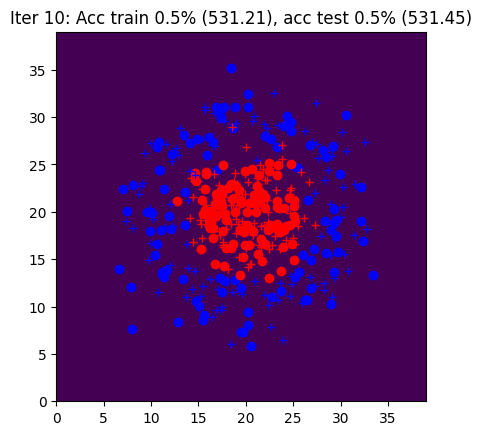

Iter 11: Acc train 0.5% (530.90), acc test 0.5% (531.13)


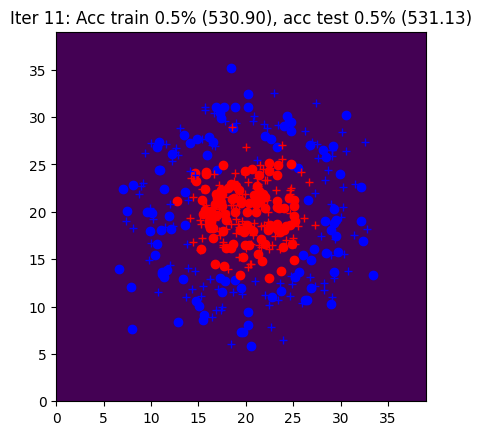

Iter 12: Acc train 0.5% (530.60), acc test 0.5% (530.81)


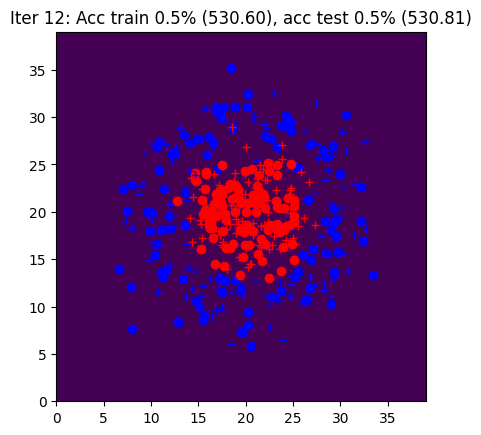

Iter 13: Acc train 0.5% (530.61), acc test 0.5% (530.83)


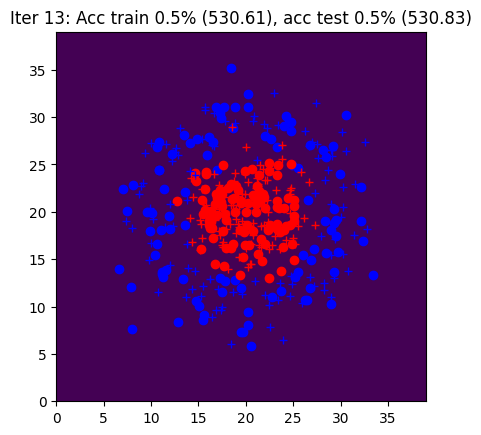

Iter 14: Acc train 0.5% (530.52), acc test 0.6% (530.75)


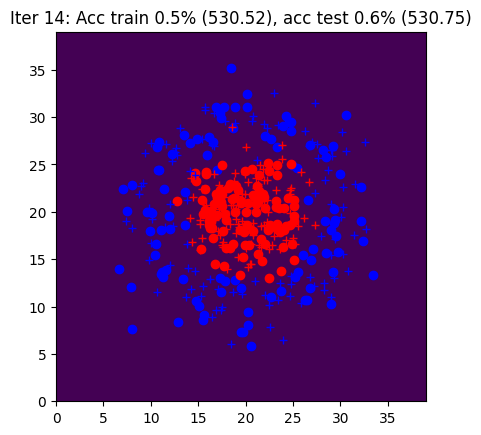

Iter 15: Acc train 0.5% (530.18), acc test 0.5% (530.36)


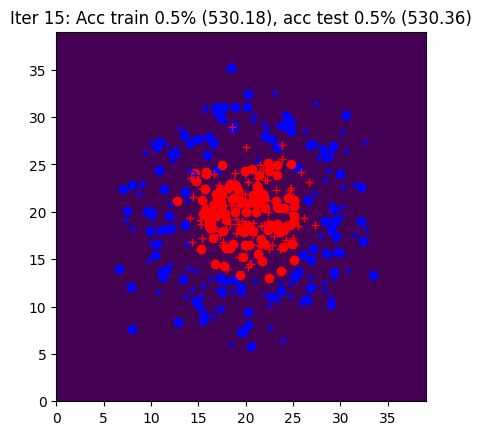

Iter 16: Acc train 0.5% (530.14), acc test 0.6% (530.32)


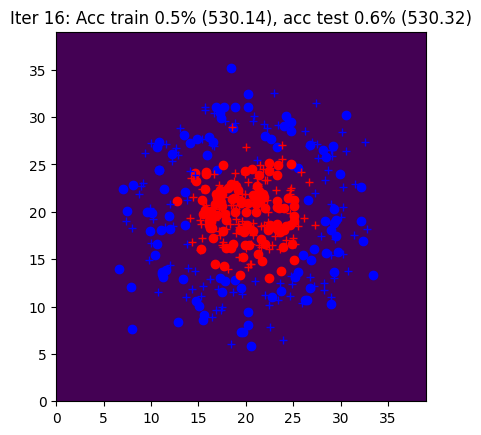

Iter 17: Acc train 0.5% (530.66), acc test 0.6% (530.90)


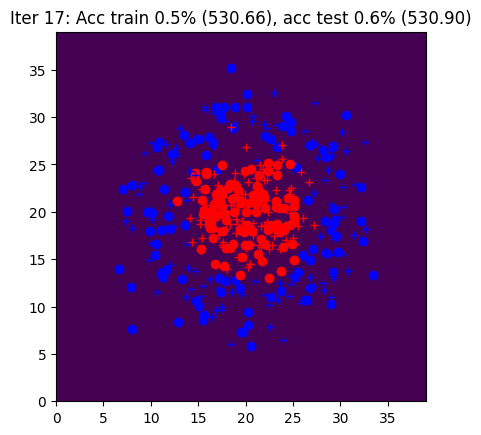

Iter 18: Acc train 0.5% (530.55), acc test 0.6% (530.75)


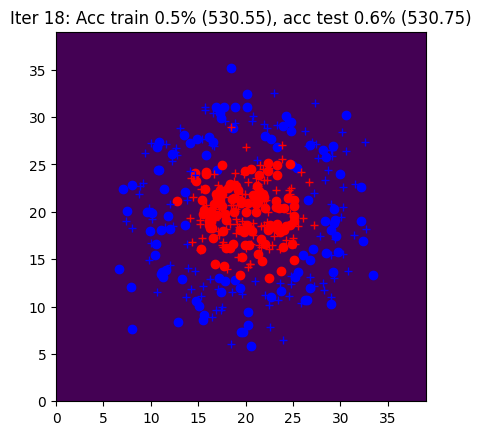

Iter 19: Acc train 0.5% (530.38), acc test 0.6% (530.55)


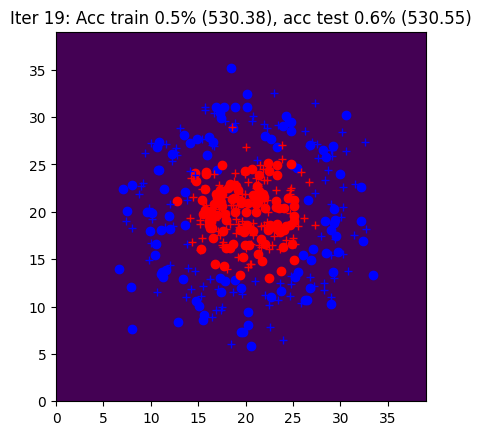

Iter 20: Acc train 0.6% (532.04), acc test 0.6% (532.20)


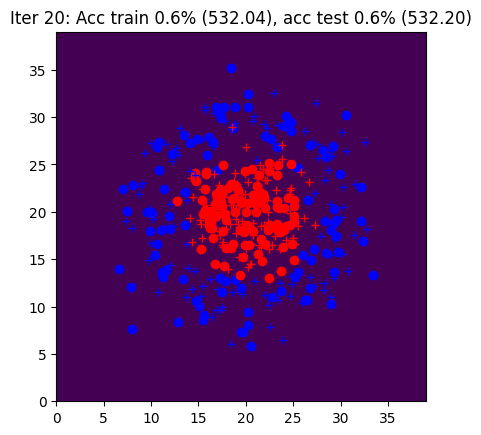

Iter 21: Acc train 0.6% (531.93), acc test 0.6% (532.04)


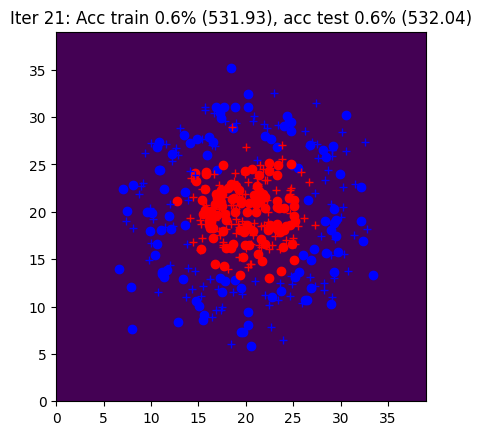

Iter 22: Acc train 0.5% (531.01), acc test 0.6% (531.07)


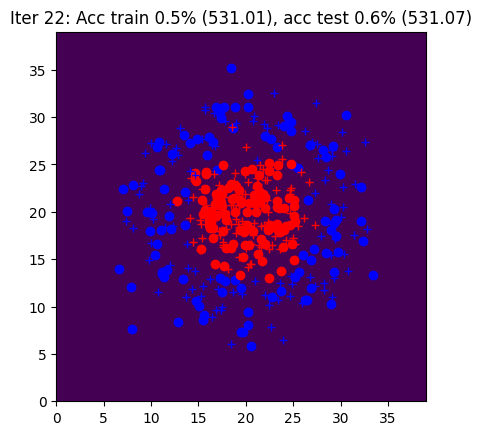

Iter 23: Acc train 0.6% (532.21), acc test 0.6% (532.22)


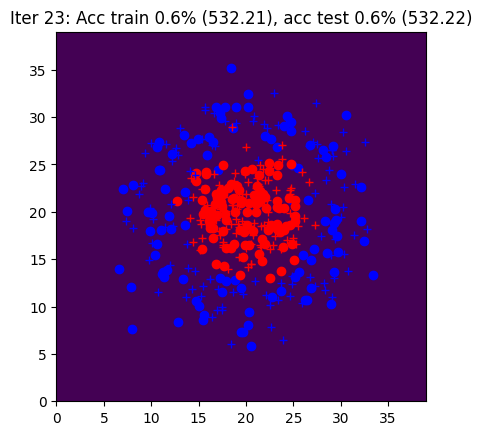

Iter 24: Acc train 0.5% (531.46), acc test 0.5% (531.45)


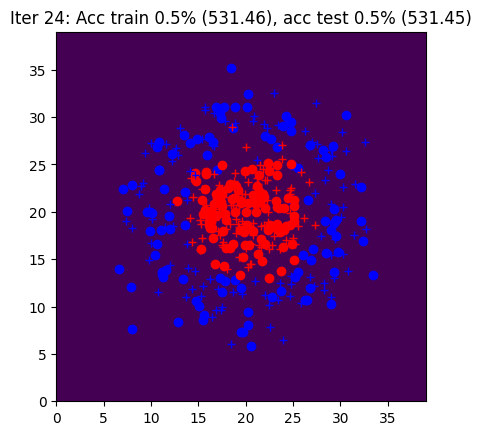

Iter 25: Acc train 0.5% (530.40), acc test 0.5% (530.41)


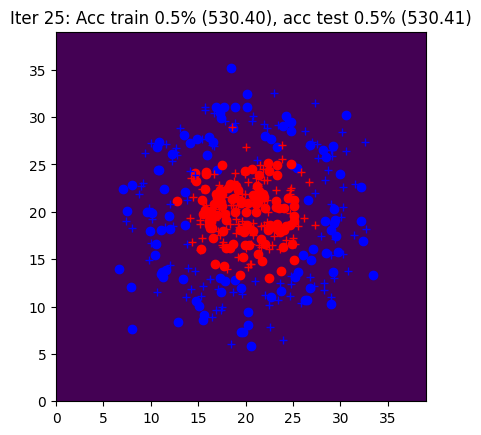

Iter 26: Acc train 0.6% (531.98), acc test 0.5% (531.91)


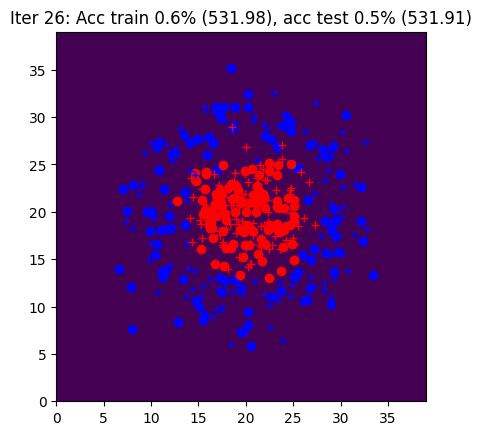

Iter 27: Acc train 0.5% (531.32), acc test 0.5% (531.28)


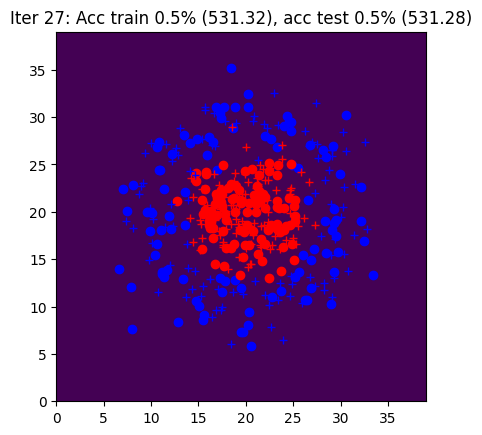

Iter 28: Acc train 0.4% (532.13), acc test 0.5% (532.03)


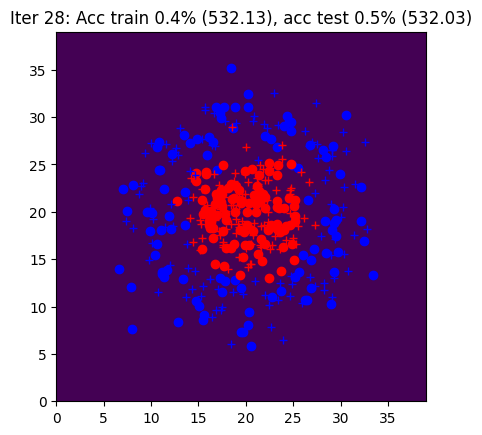

Iter 29: Acc train 0.4% (534.28), acc test 0.4% (534.10)


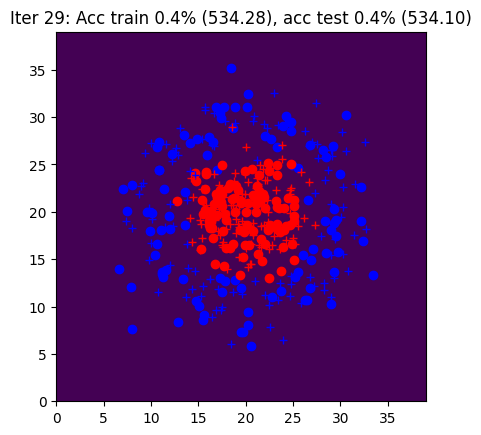

Iter 30: Acc train 0.4% (532.39), acc test 0.5% (532.31)


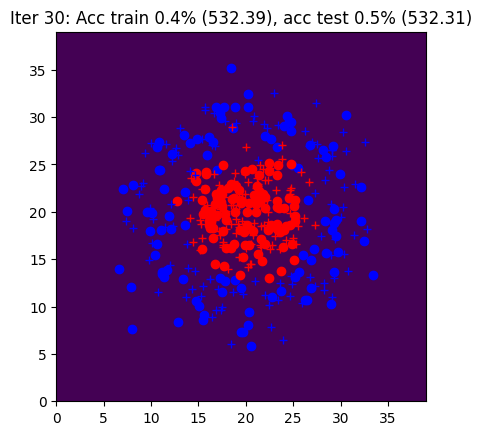

Iter 31: Acc train 0.4% (535.37), acc test 0.4% (535.13)


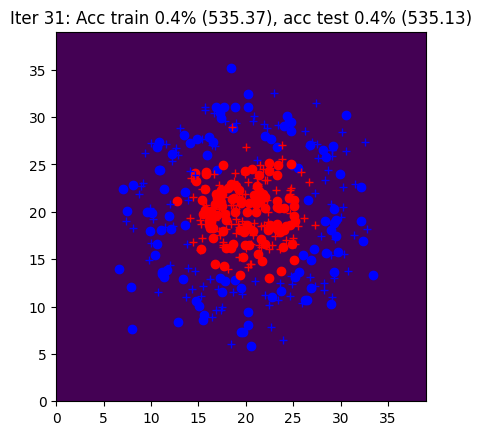

Iter 32: Acc train 0.4% (534.83), acc test 0.4% (534.55)


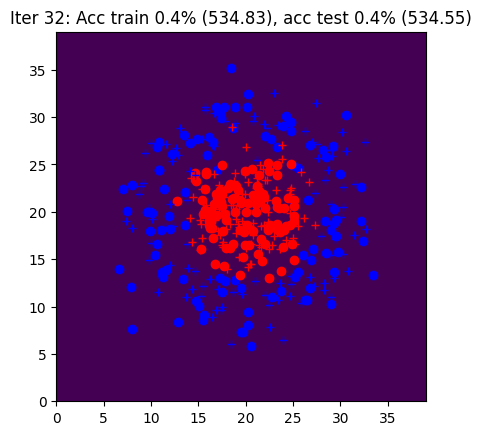

Iter 33: Acc train 0.5% (530.35), acc test 0.5% (530.34)


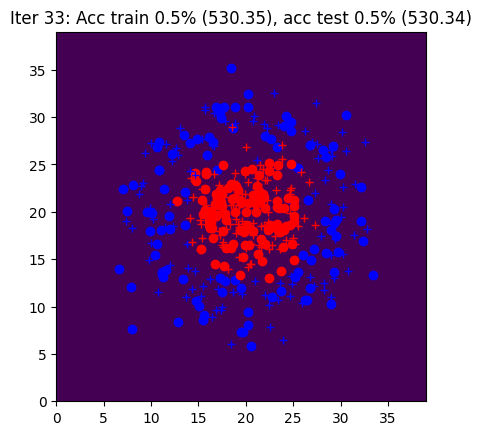

Iter 34: Acc train 0.4% (532.76), acc test 0.4% (532.68)


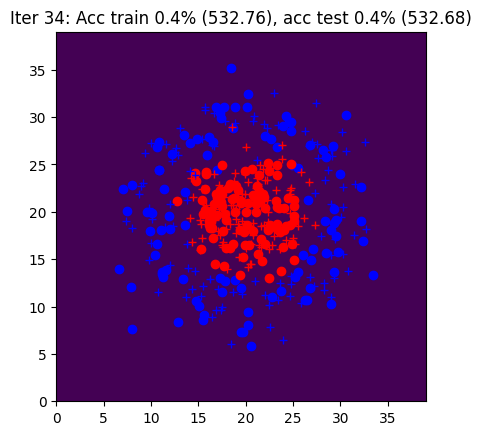

Iter 35: Acc train 0.5% (532.55), acc test 0.5% (532.56)


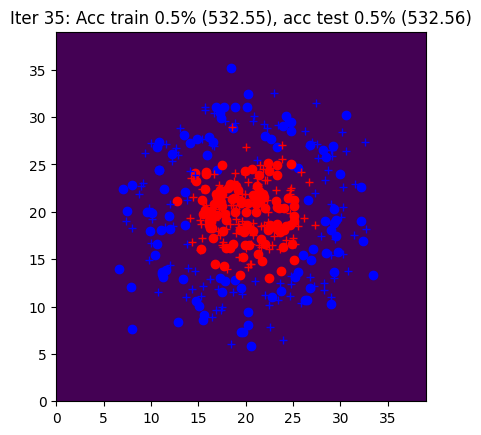

Iter 36: Acc train 0.4% (532.64), acc test 0.5% (532.52)


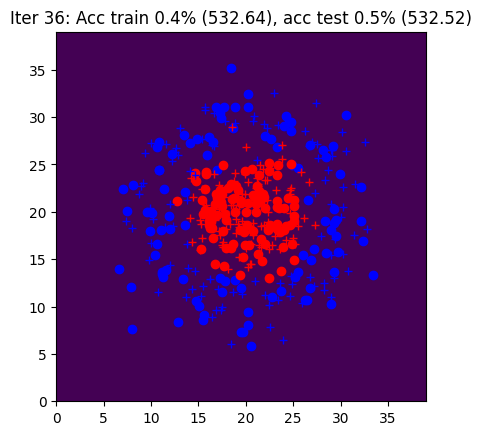

Iter 37: Acc train 0.5% (530.27), acc test 0.5% (530.26)


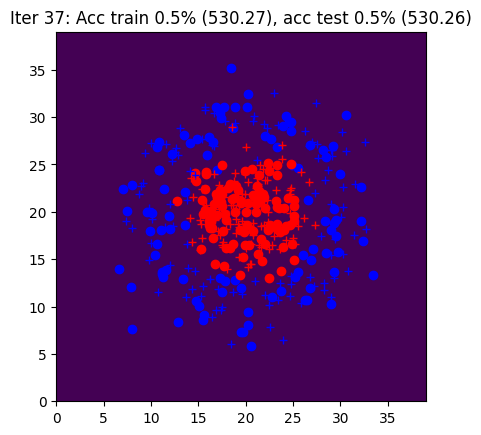

Iter 38: Acc train 0.5% (530.87), acc test 0.5% (530.86)


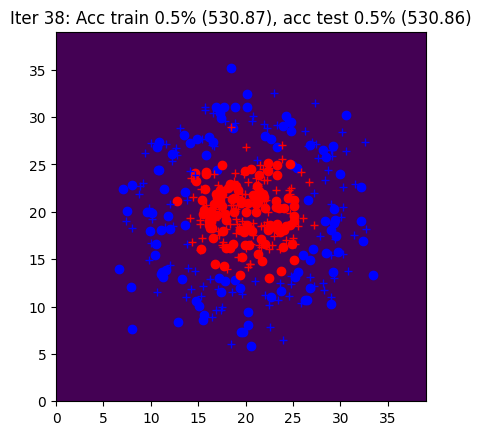

Iter 39: Acc train 0.4% (534.67), acc test 0.4% (534.67)


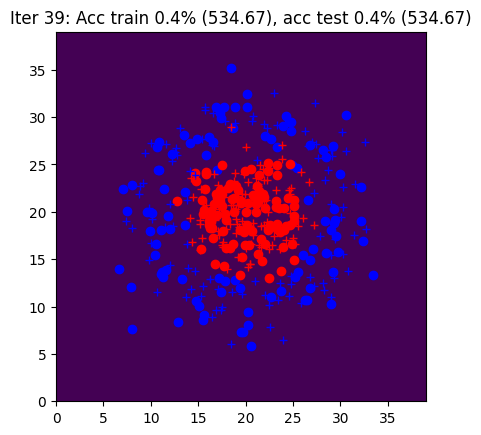

Iter 40: Acc train 0.5% (531.72), acc test 0.5% (531.70)


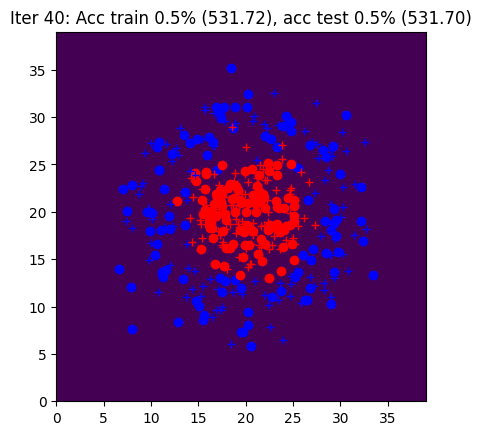

Iter 41: Acc train 0.4% (532.39), acc test 0.5% (532.37)


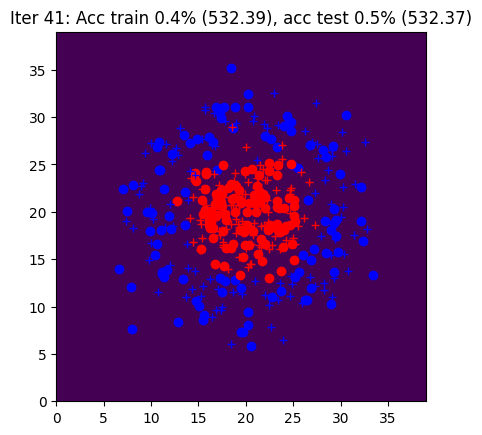

Iter 42: Acc train 0.4% (533.41), acc test 0.5% (533.27)


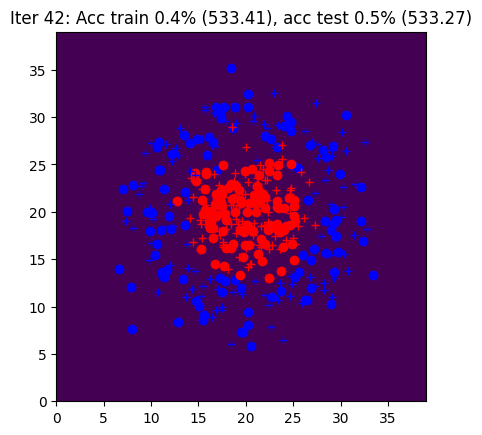

Iter 43: Acc train 0.4% (534.23), acc test 0.5% (534.23)


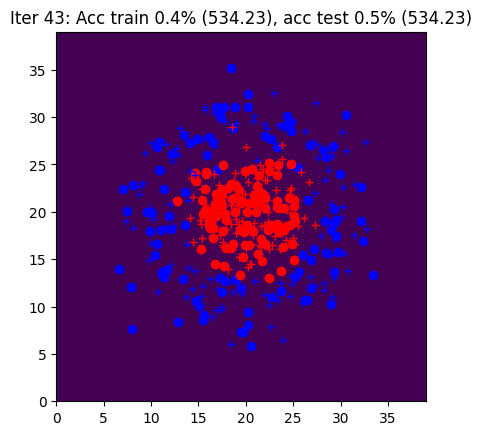

Iter 44: Acc train 0.4% (540.55), acc test 0.4% (540.11)


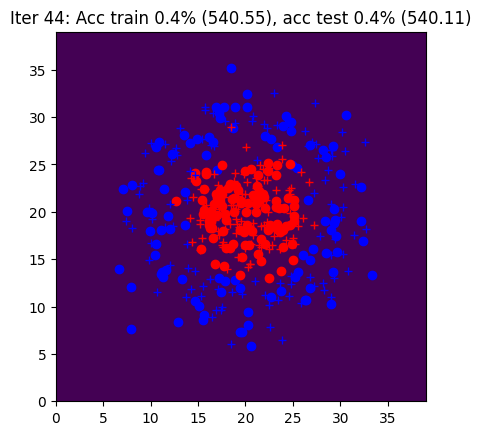

Iter 45: Acc train 0.5% (529.90), acc test 0.5% (529.90)


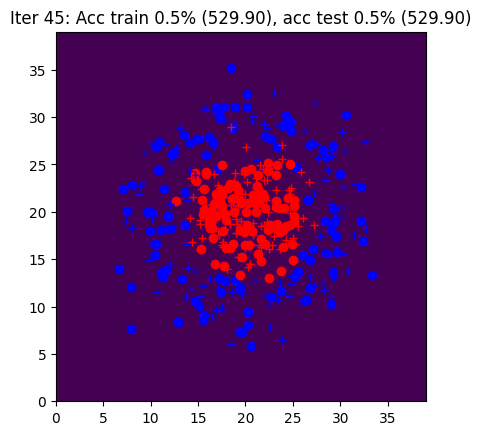

Iter 46: Acc train 0.4% (537.20), acc test 0.5% (537.14)


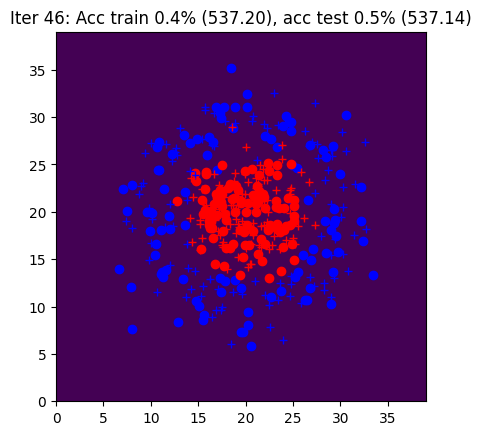

Iter 47: Acc train 0.5% (531.94), acc test 0.5% (531.92)


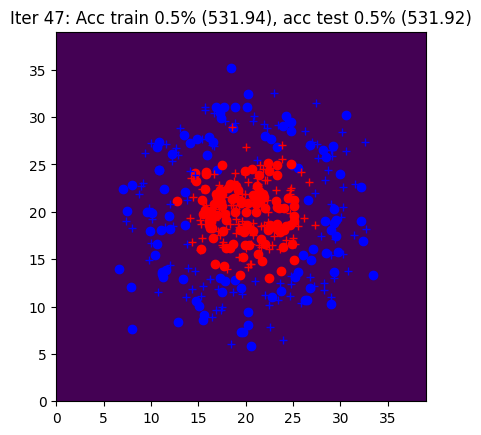

Iter 48: Acc train 0.5% (534.58), acc test 0.5% (534.63)


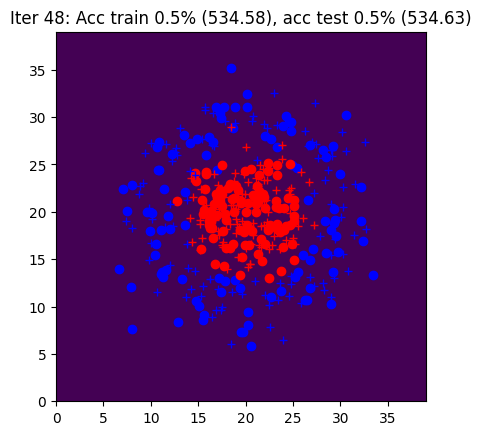

Iter 49: Acc train 0.4% (532.52), acc test 0.5% (532.40)


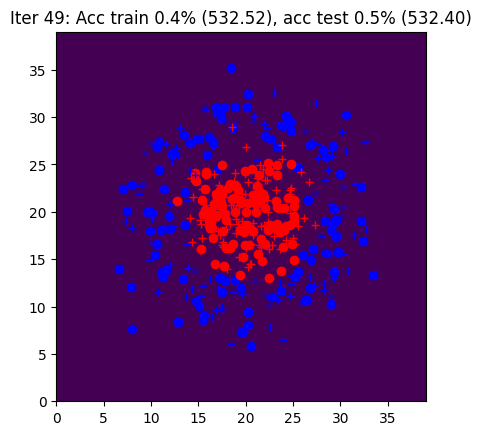

Iter 50: Acc train 0.3% (560.46), acc test 0.4% (557.59)


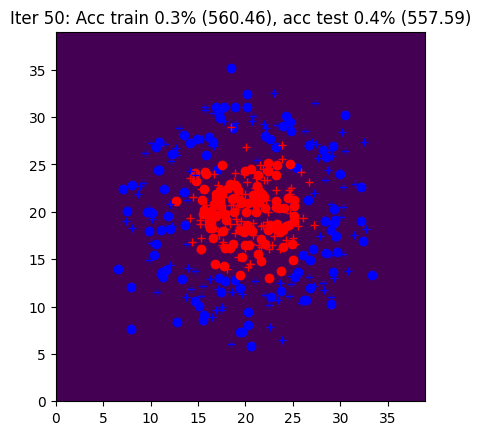

Iter 51: Acc train 0.4% (542.03), acc test 0.4% (541.89)


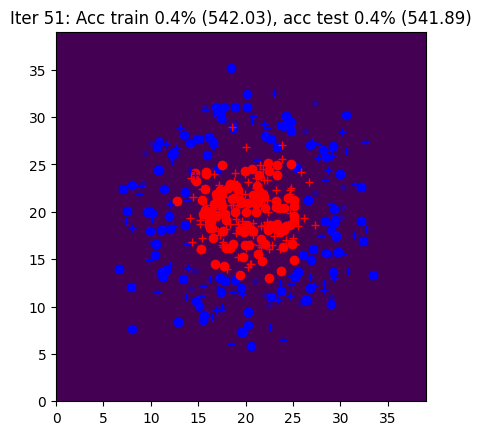

Iter 52: Acc train 0.6% (543.28), acc test 0.6% (543.14)


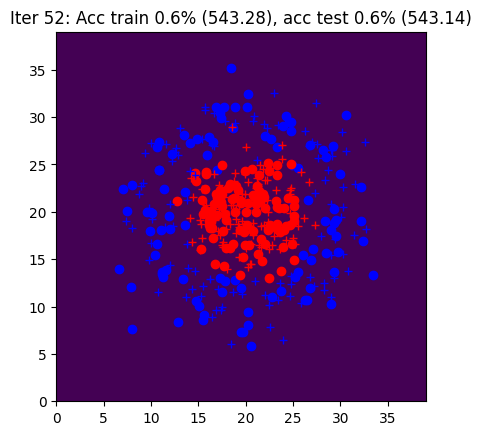

Iter 53: Acc train 0.5% (537.59), acc test 0.5% (537.55)


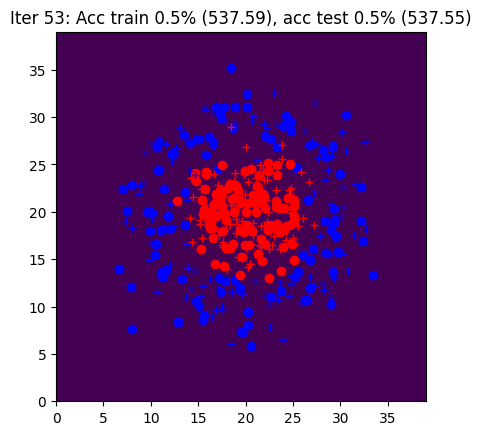

Iter 54: Acc train 0.5% (533.31), acc test 0.5% (533.35)


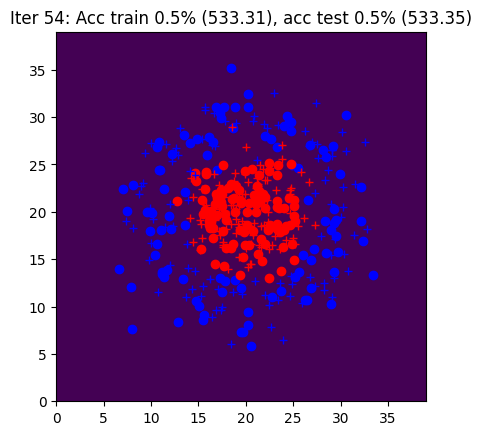

Iter 55: Acc train 0.4% (548.46), acc test 0.4% (548.21)


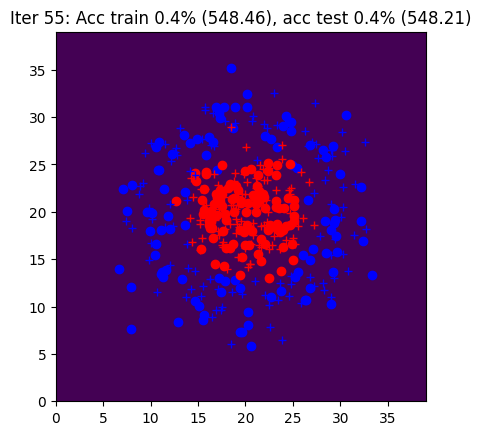

Iter 56: Acc train 0.4% (536.30), acc test 0.4% (535.85)


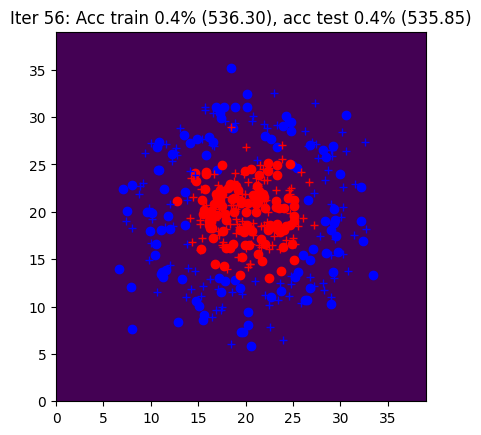

Iter 57: Acc train 0.4% (565.45), acc test 0.4% (565.82)


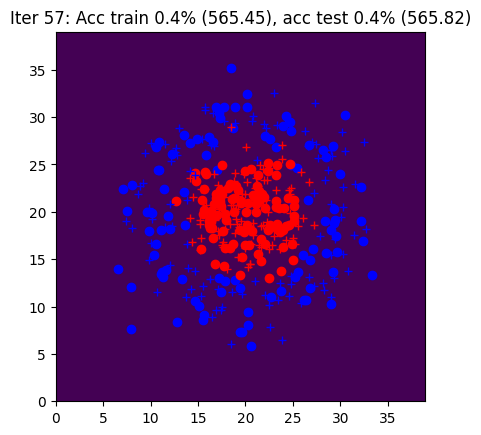

Iter 58: Acc train 0.5% (535.45), acc test 0.5% (535.39)


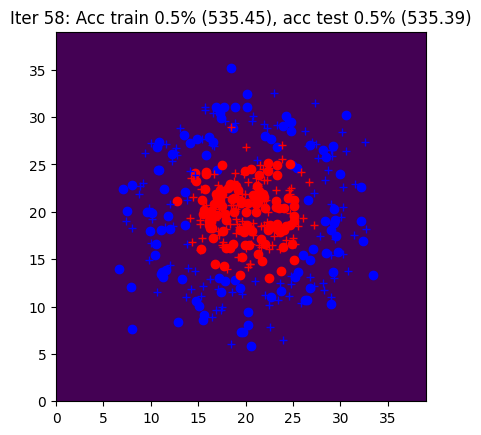

Iter 59: Acc train 0.5% (533.13), acc test 0.5% (533.16)


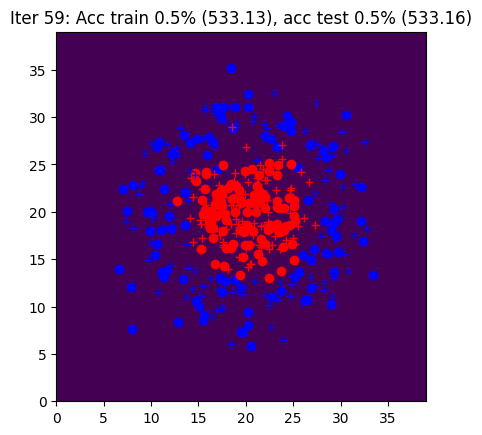

Iter 60: Acc train 0.4% (541.52), acc test 0.4% (541.59)


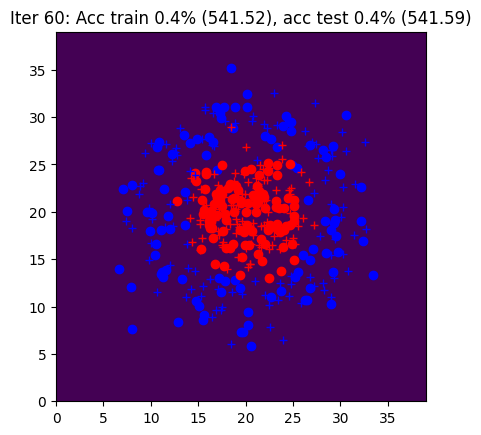

Iter 61: Acc train 0.5% (534.89), acc test 0.5% (534.87)


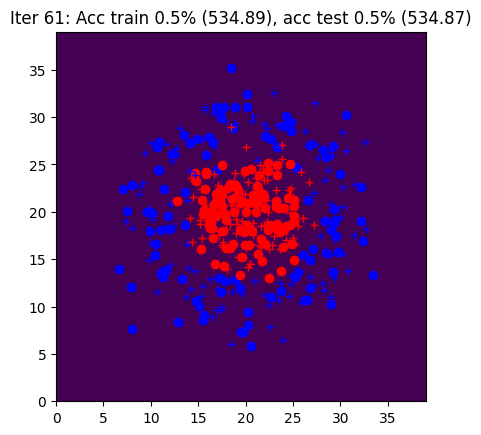

Iter 62: Acc train 0.4% (539.17), acc test 0.4% (538.48)


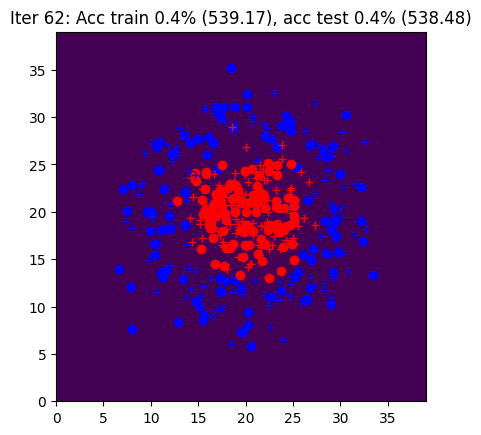

Iter 63: Acc train 0.5% (531.87), acc test 0.5% (531.85)


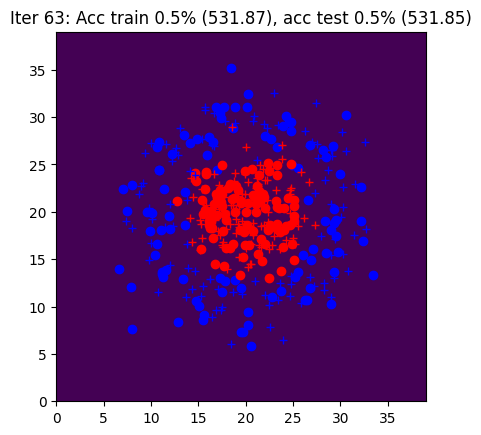

Iter 64: Acc train 0.4% (584.34), acc test 0.4% (583.85)


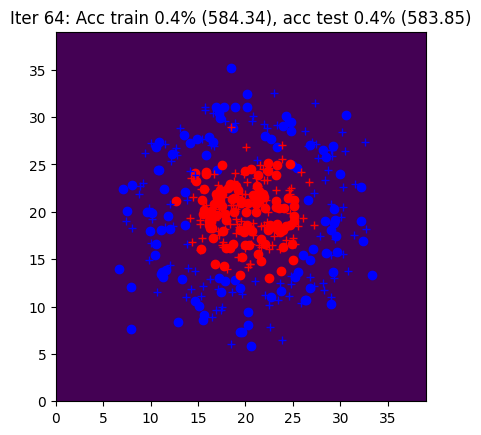

Iter 65: Acc train 0.4% (557.65), acc test 0.4% (557.99)


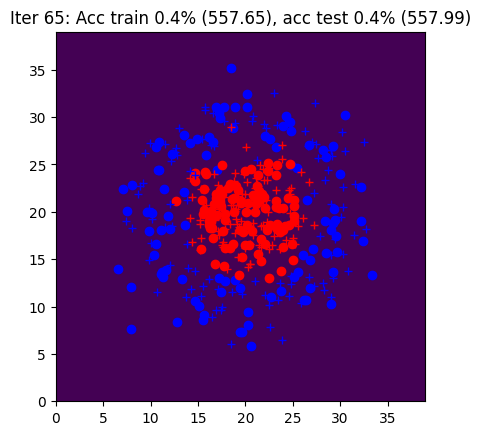

Iter 66: Acc train 0.4% (542.14), acc test 0.5% (542.07)


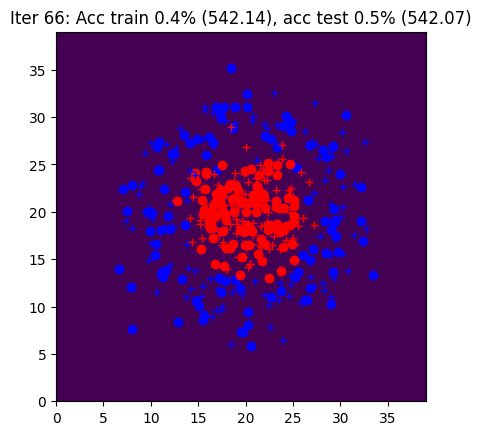

Iter 67: Acc train 0.4% (533.07), acc test 0.4% (532.99)


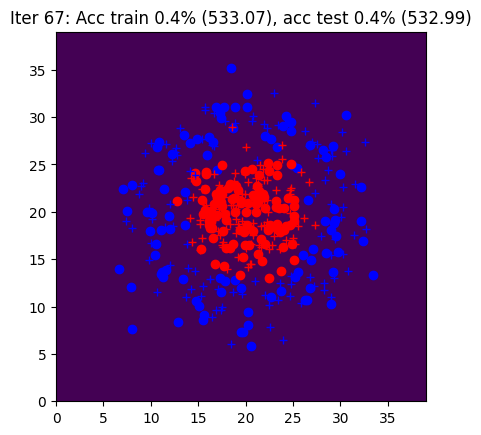

Iter 68: Acc train 0.4% (651.11), acc test 0.4% (641.48)


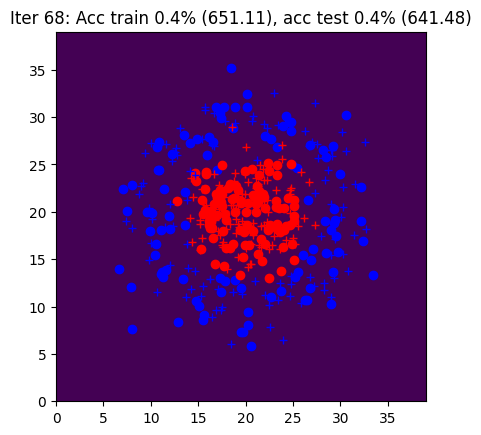

Iter 69: Acc train 0.4% (563.76), acc test 0.3% (561.85)


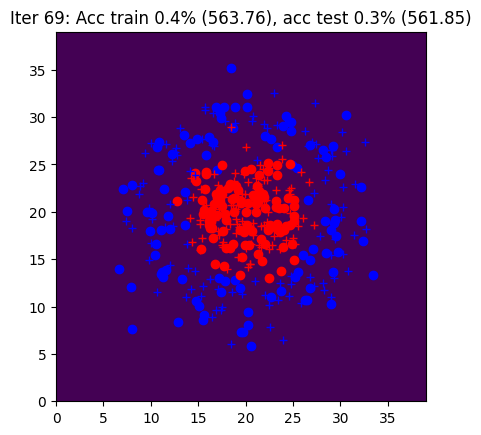

Iter 70: Acc train 0.4% (618.15), acc test 0.4% (613.00)


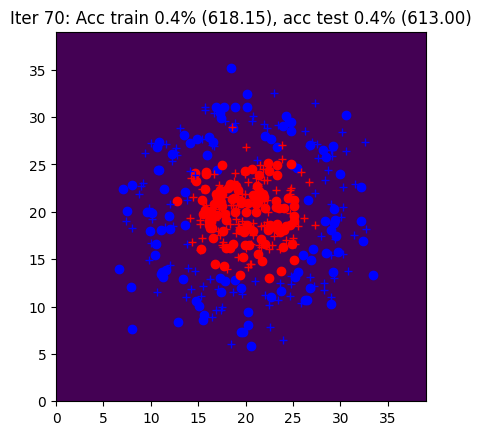

Iter 71: Acc train 0.6% (534.26), acc test 0.6% (534.03)


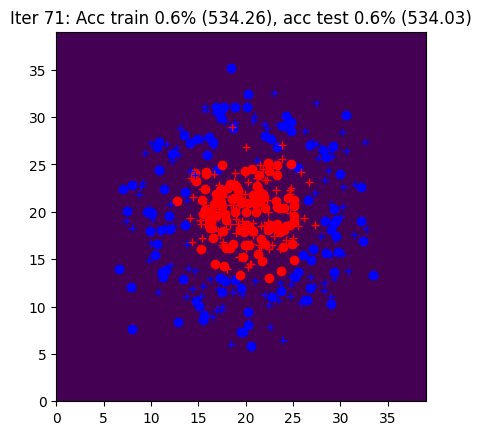

Iter 72: Acc train 0.6% (569.98), acc test 0.6% (566.68)


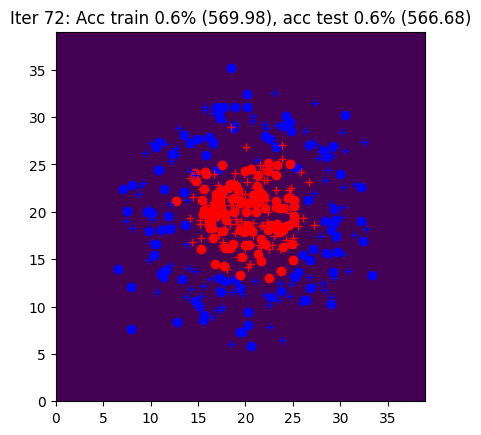

Iter 73: Acc train 0.4% (552.09), acc test 0.4% (550.91)


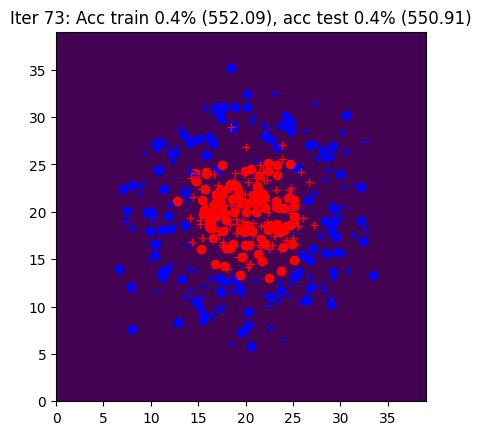

Iter 74: Acc train 0.5% (534.87), acc test 0.5% (534.92)


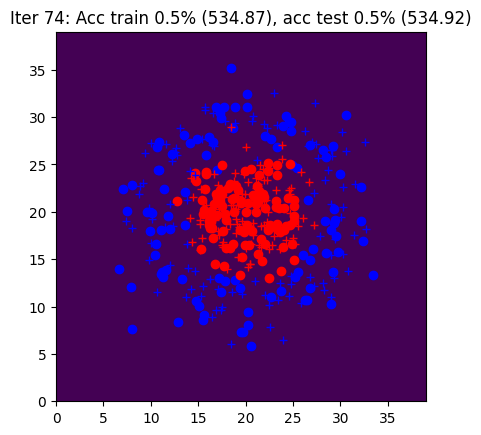

Iter 75: Acc train 0.4% (554.93), acc test 0.4% (555.44)


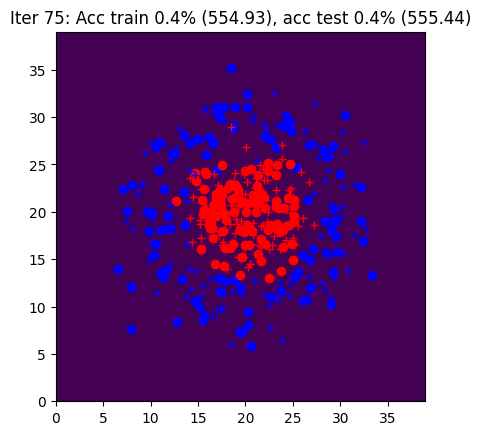

Iter 76: Acc train 0.6% (554.45), acc test 0.6% (552.49)


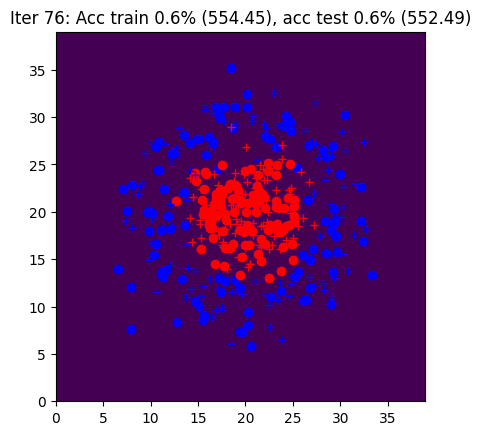

Iter 77: Acc train 0.6% (544.42), acc test 0.6% (543.86)


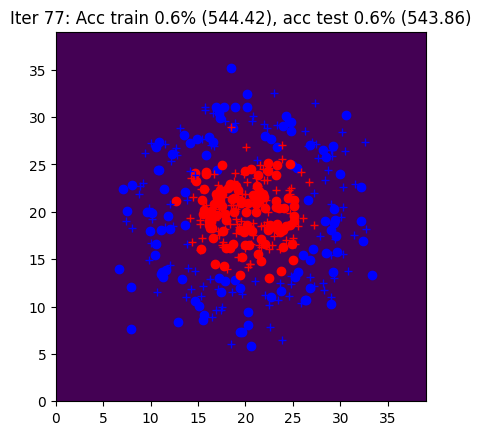

Iter 78: Acc train 0.6% (611.42), acc test 0.5% (614.76)


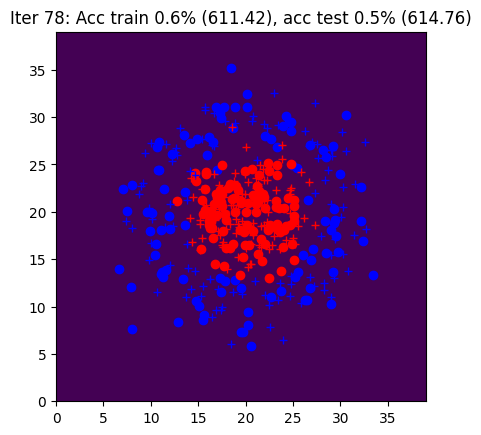

Iter 79: Acc train 0.6% (576.88), acc test 0.6% (576.36)


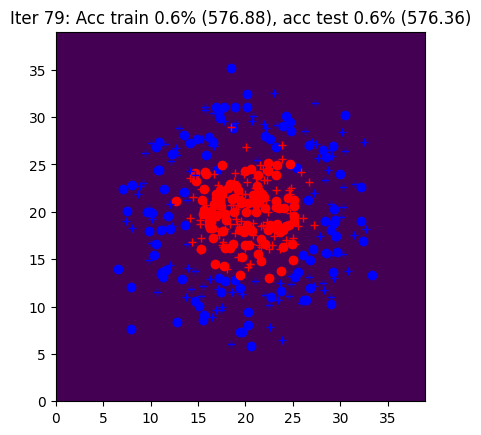

Iter 80: Acc train 0.6% (644.76), acc test 0.7% (632.05)


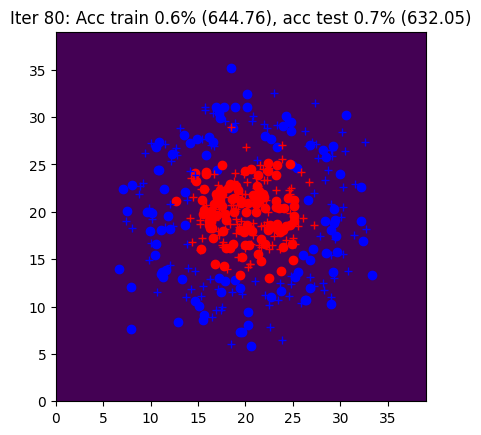

Iter 81: Acc train 0.6% (586.81), acc test 0.6% (587.96)


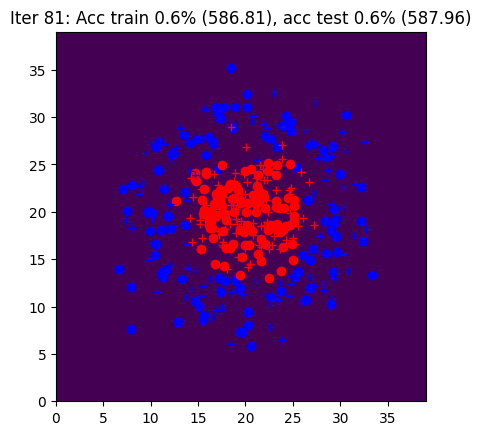

Iter 82: Acc train 0.4% (586.25), acc test 0.4% (582.84)


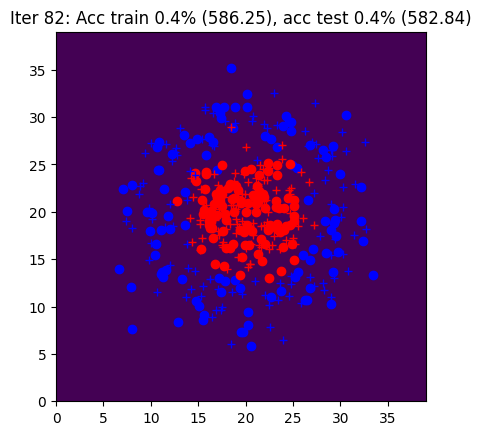

Iter 83: Acc train 0.5% (530.11), acc test 0.5% (530.16)


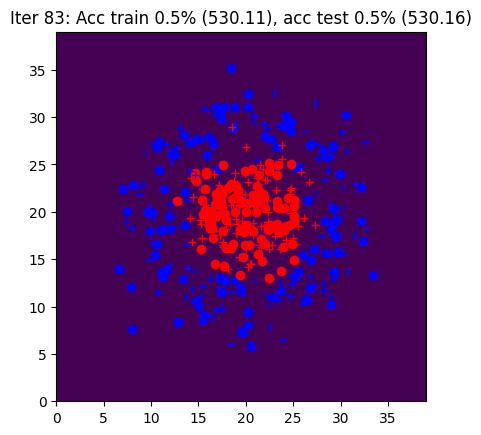

Iter 84: Acc train 0.6% (547.14), acc test 0.6% (547.41)


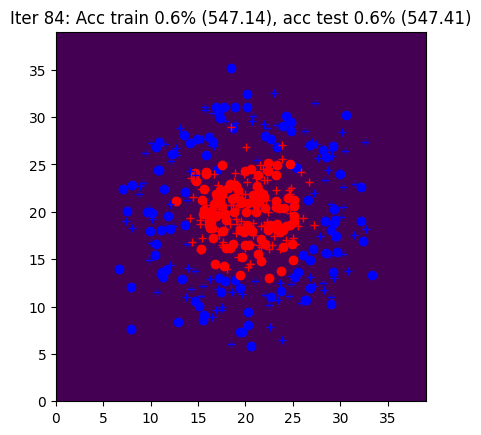

Iter 85: Acc train 0.6% (614.56), acc test 0.6% (606.84)


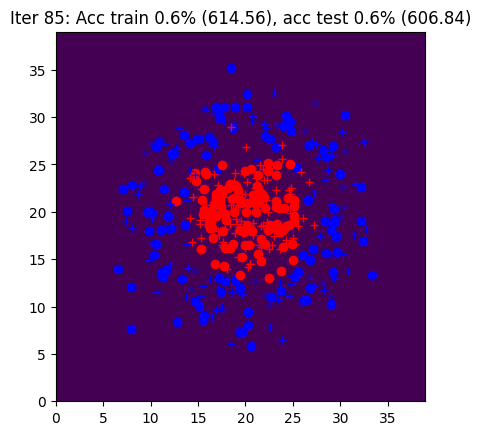

Iter 86: Acc train 0.6% (550.76), acc test 0.5% (550.91)


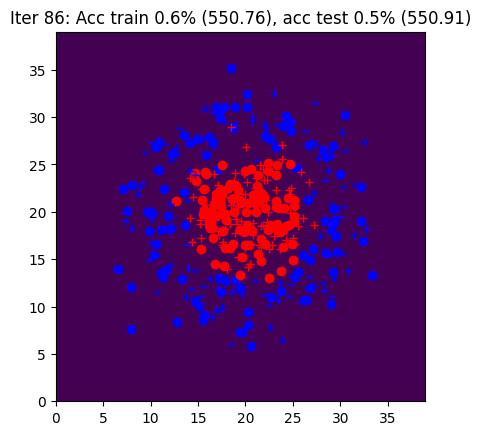

Iter 87: Acc train 0.6% (620.49), acc test 0.6% (610.49)


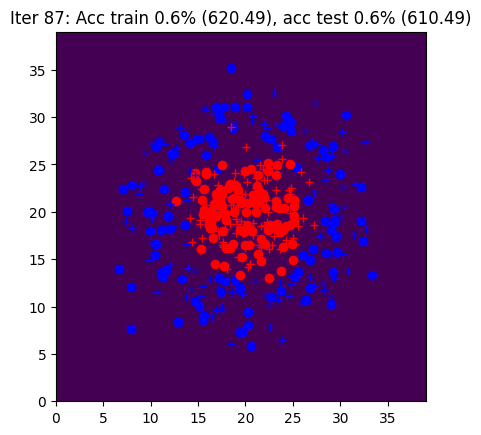

Iter 88: Acc train 0.6% (636.14), acc test 0.6% (622.86)


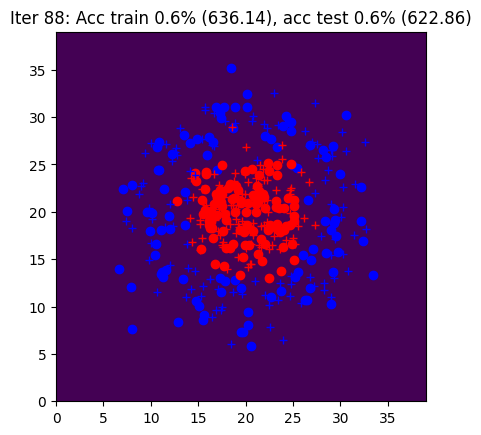

Iter 89: Acc train 0.7% (578.84), acc test 0.6% (579.86)


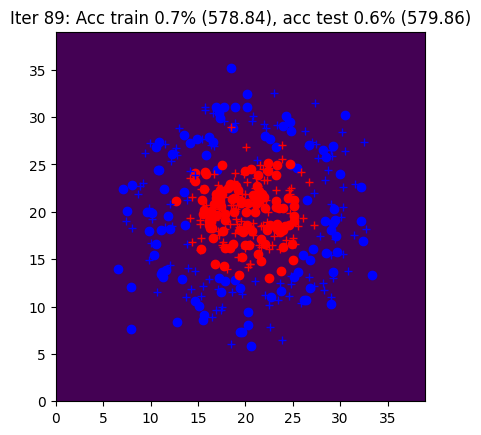

Iter 90: Acc train 0.5% (532.57), acc test 0.5% (532.67)


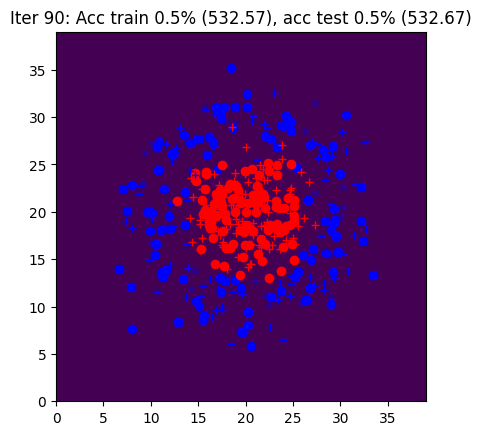

Iter 91: Acc train 0.6% (781.89), acc test 0.6% (786.88)


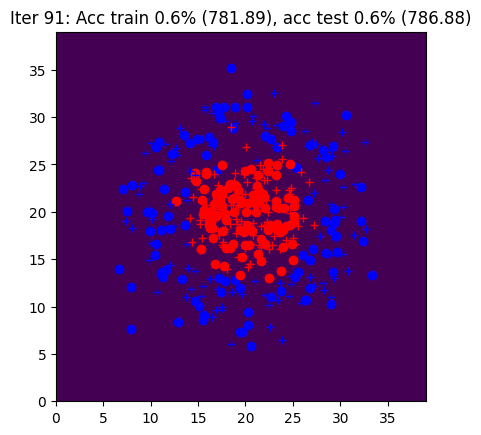

Iter 92: Acc train 0.6% (558.22), acc test 0.6% (558.45)


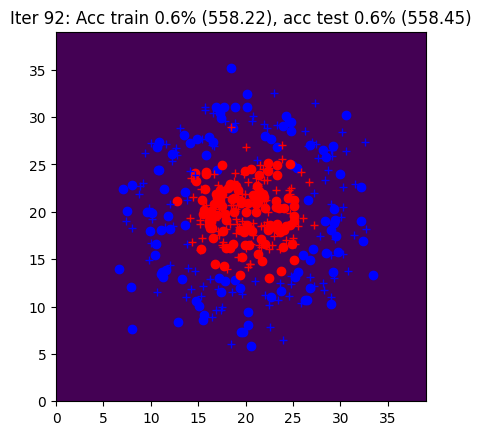

Iter 93: Acc train 0.4% (564.71), acc test 0.4% (564.10)


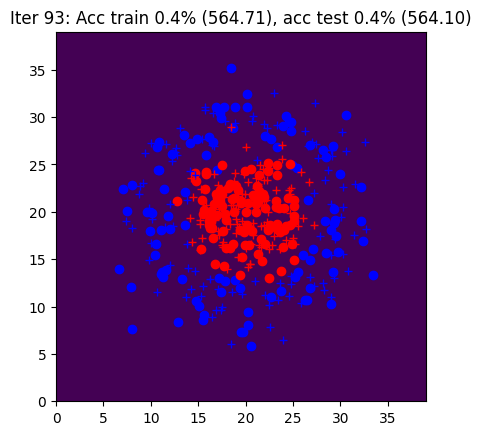

Iter 94: Acc train 0.6% (725.17), acc test 0.6% (701.26)


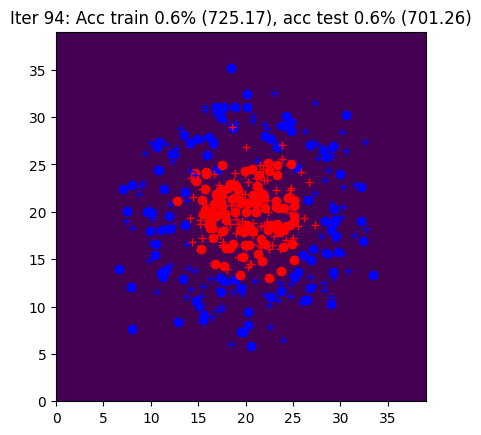

Iter 95: Acc train 0.5% (532.06), acc test 0.5% (532.11)


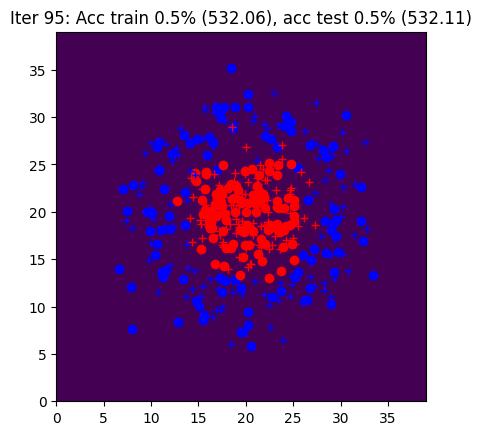

Iter 96: Acc train 0.6% (552.81), acc test 0.6% (553.11)


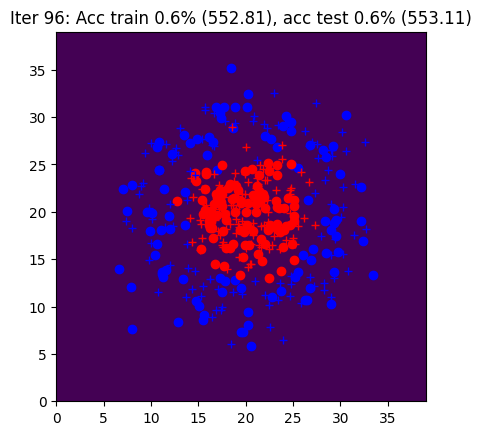

Iter 97: Acc train 0.4% (656.85), acc test 0.5% (660.16)


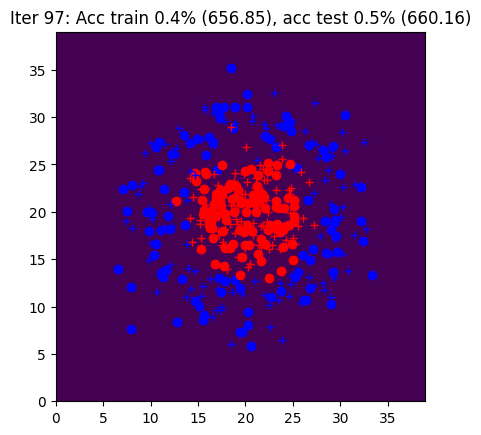

Iter 98: Acc train 0.6% (592.06), acc test 0.6% (592.49)


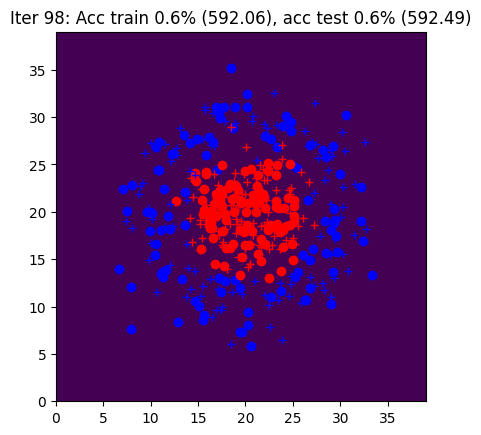

Iter 99: Acc train 0.6% (769.33), acc test 0.6% (739.56)


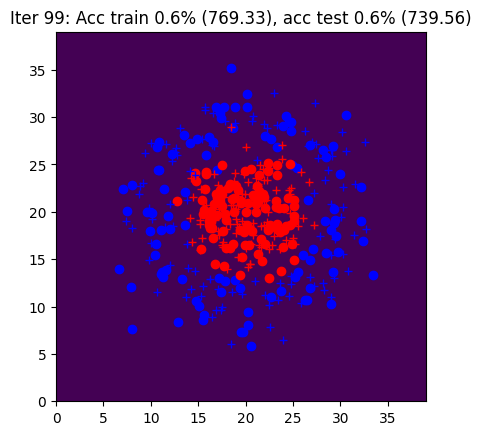

Iter 100: Acc train 0.6% (604.93), acc test 0.7% (605.22)


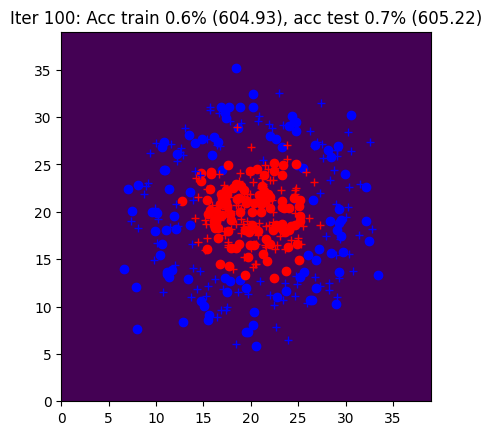

Iter 101: Acc train 0.6% (542.62), acc test 0.6% (541.88)


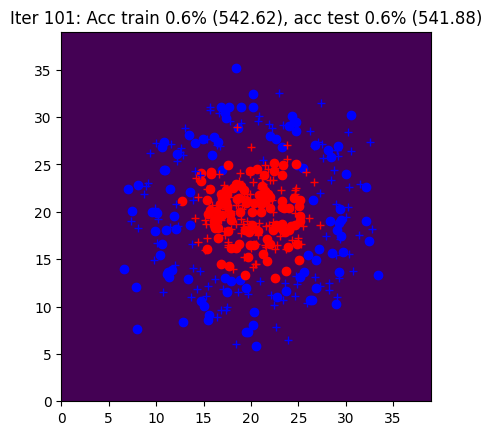

Iter 102: Acc train 0.6% (655.88), acc test 0.6% (652.10)


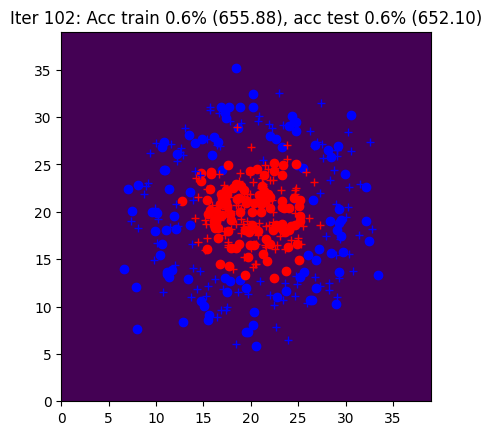

Iter 103: Acc train 0.4% (661.68), acc test 0.4% (650.38)


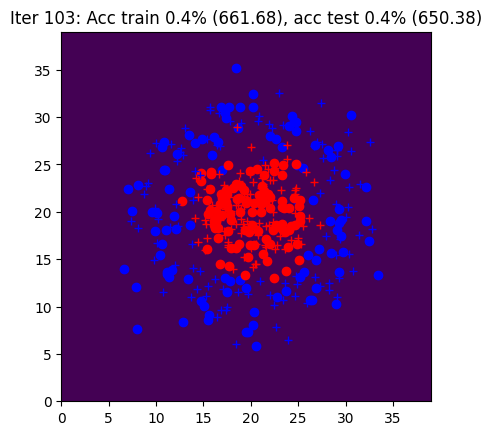

Iter 104: Acc train 0.6% (579.22), acc test 0.6% (578.30)


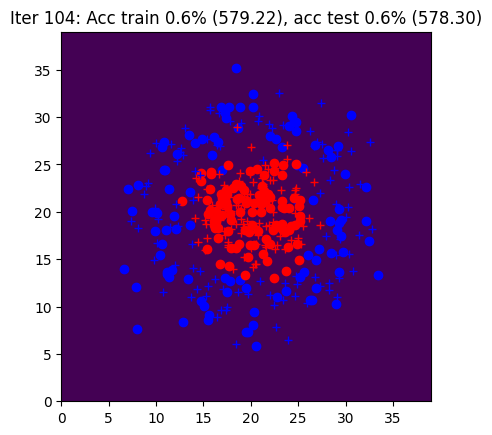

Iter 105: Acc train 0.6% (545.92), acc test 0.5% (545.98)


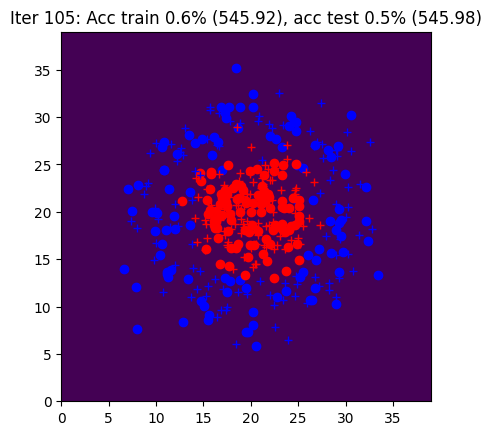

Iter 106: Acc train 0.6% (530.17), acc test 0.5% (530.04)


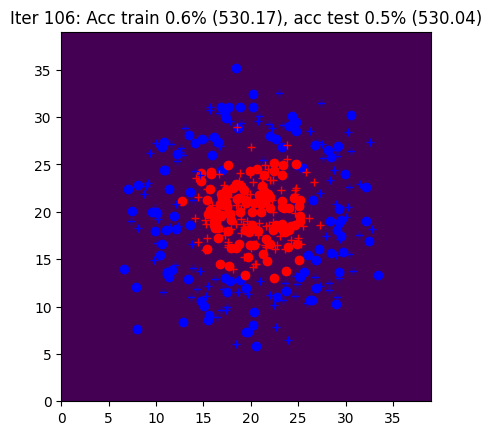

Iter 107: Acc train 0.4% (567.92), acc test 0.5% (568.26)


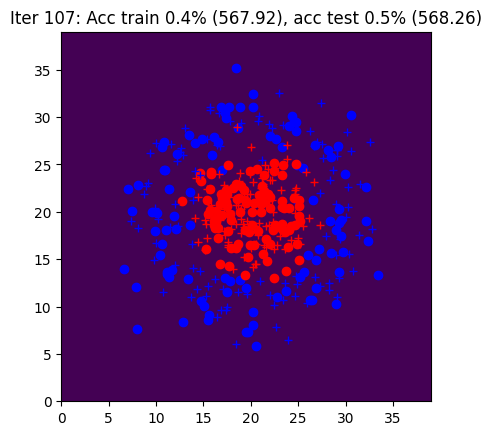

Iter 108: Acc train 0.6% (681.03), acc test 0.6% (665.59)


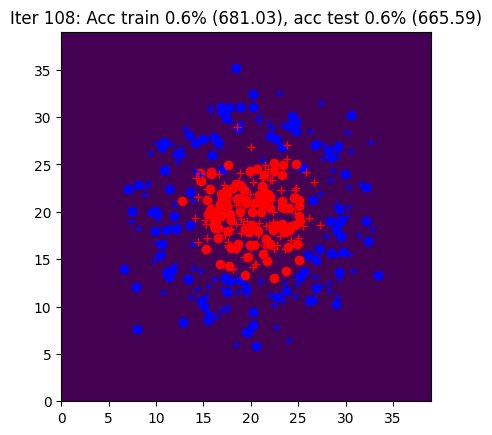

Iter 109: Acc train 0.4% (640.83), acc test 0.4% (631.50)


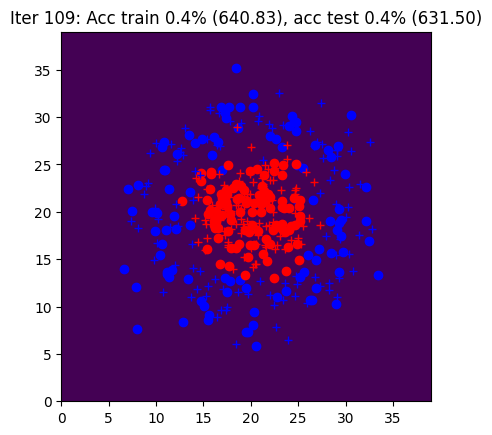

Iter 110: Acc train 0.4% (551.56), acc test 0.4% (551.09)


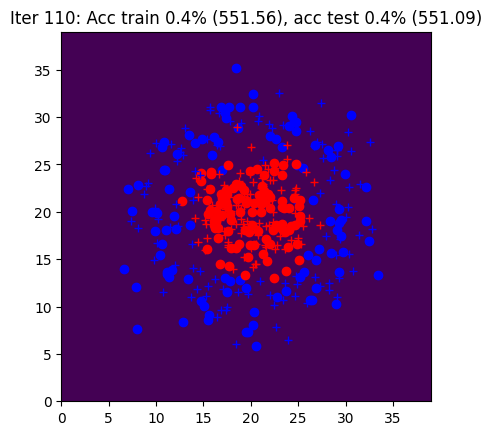

Iter 111: Acc train 0.6% (656.31), acc test 0.6% (637.20)


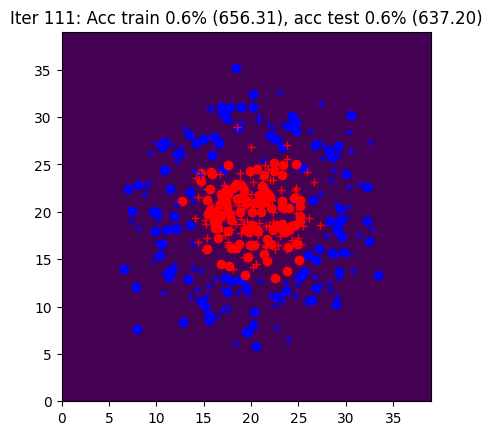

Iter 112: Acc train 0.6% (674.23), acc test 0.6% (653.04)


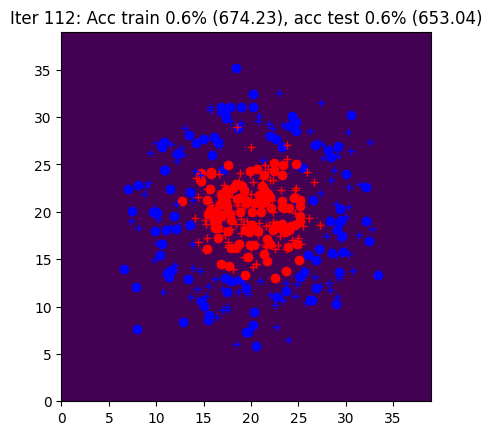

Iter 113: Acc train 0.4% (595.50), acc test 0.4% (591.14)


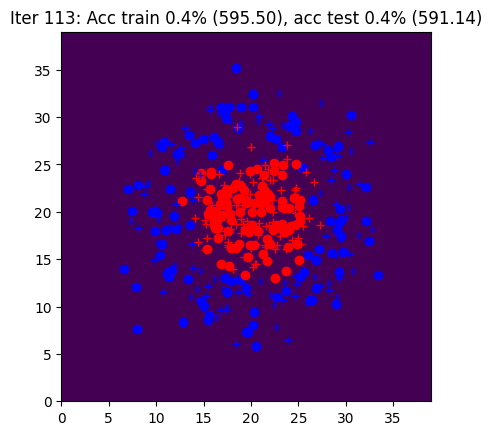

Iter 114: Acc train 0.6% (625.21), acc test 0.6% (624.42)


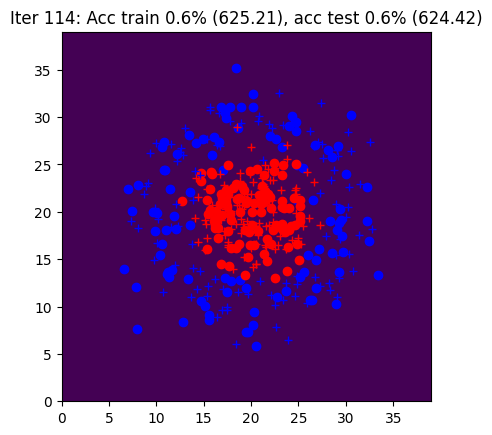

Iter 115: Acc train 0.6% (547.30), acc test 0.5% (547.56)


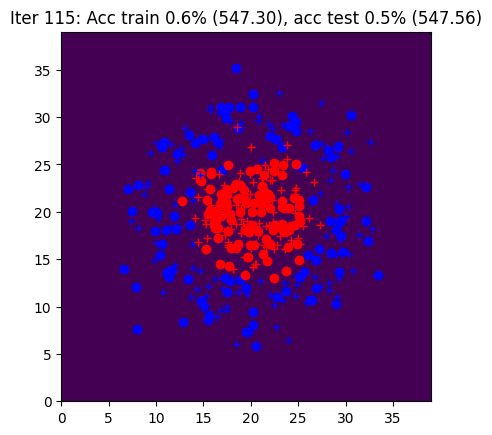

Iter 116: Acc train 0.6% (620.19), acc test 0.6% (607.76)


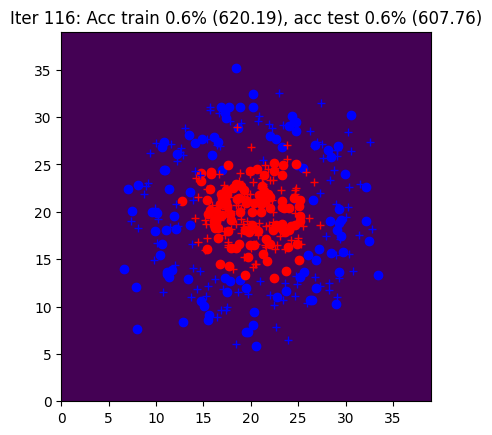

Iter 117: Acc train 0.4% (568.62), acc test 0.4% (567.44)


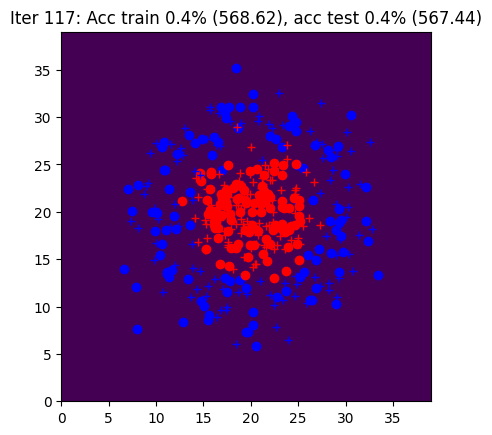

Iter 118: Acc train 0.6% (635.11), acc test 0.6% (620.14)


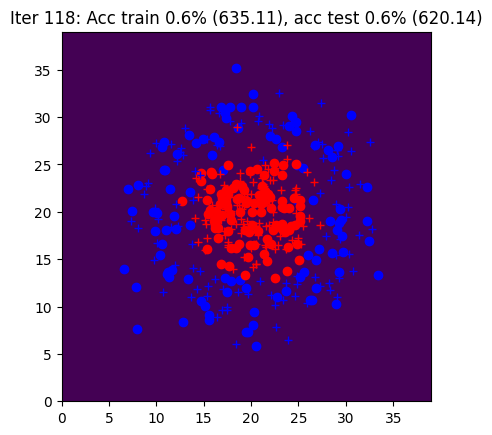

Iter 119: Acc train 0.4% (657.66), acc test 0.4% (646.90)


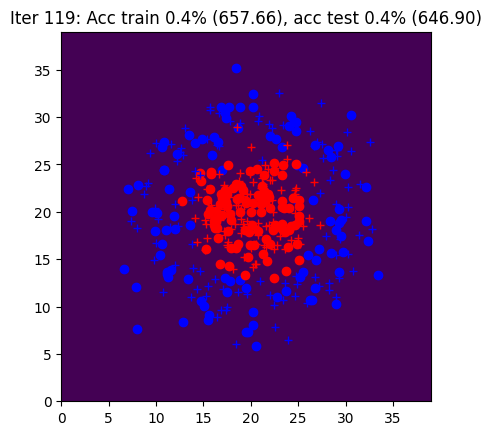

Iter 120: Acc train 0.6% (675.90), acc test 0.6% (651.63)


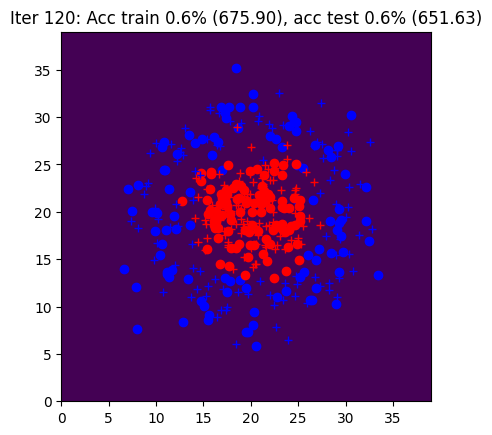

Iter 121: Acc train 0.6% (733.85), acc test 0.6% (733.24)


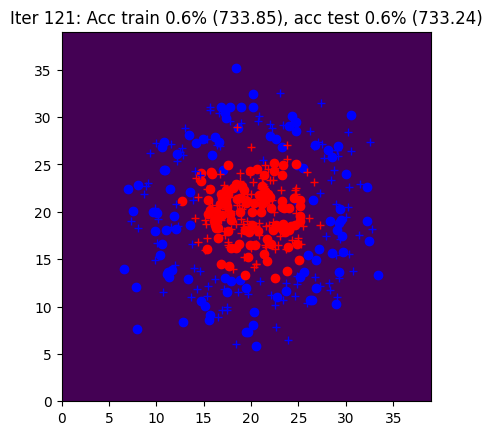

Iter 122: Acc train 0.4% (670.29), acc test 0.4% (667.17)


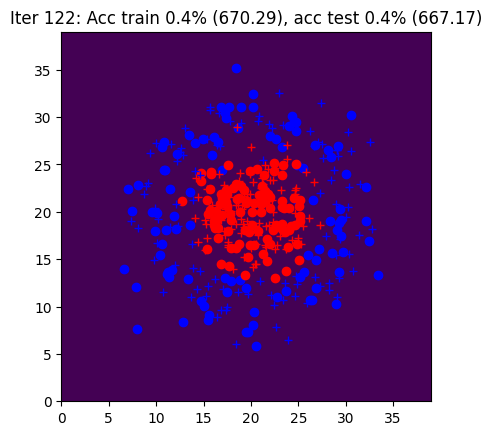

Iter 123: Acc train 0.6% (1017.48), acc test 0.6% (964.66)


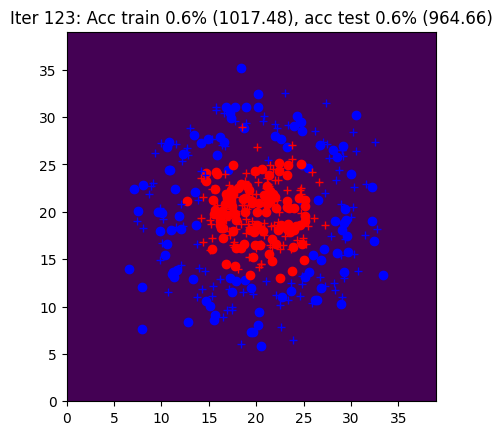

Iter 124: Acc train 0.4% (611.76), acc test 0.4% (607.33)


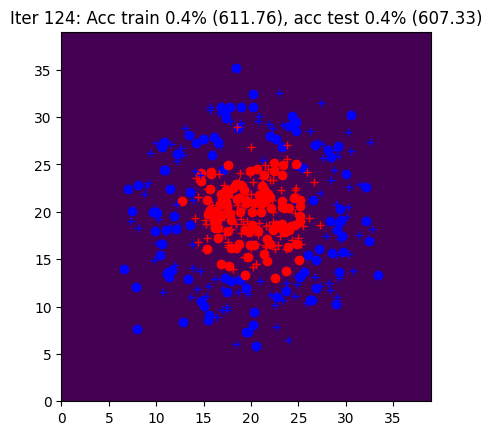

Iter 125: Acc train 0.6% (778.62), acc test 0.6% (729.24)


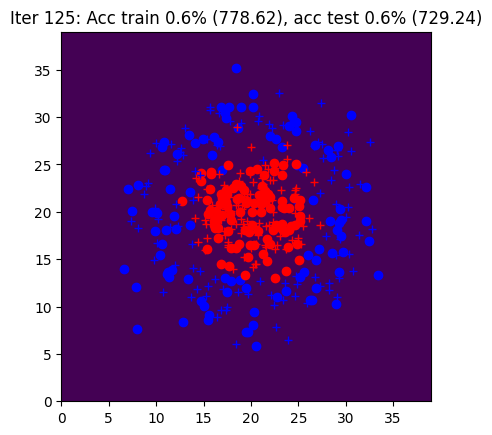

Iter 126: Acc train 0.6% (623.30), acc test 0.6% (608.58)


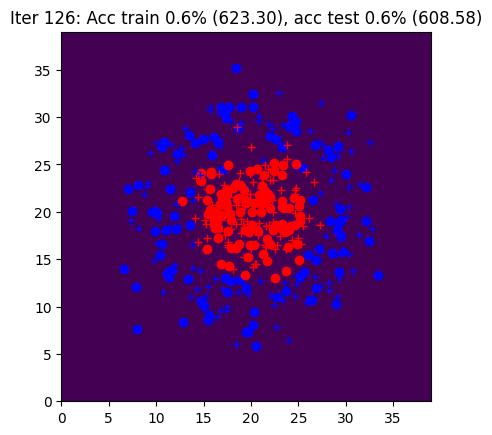

Iter 127: Acc train 0.6% (668.45), acc test 0.6% (658.40)


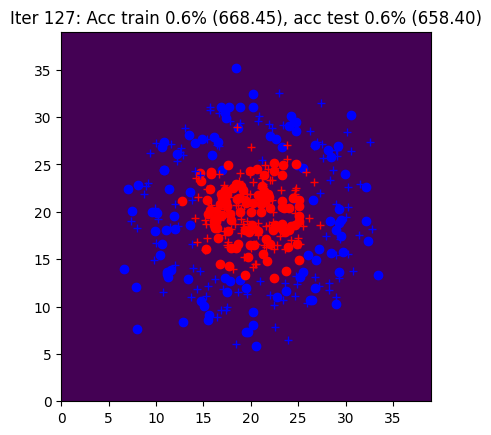

Iter 128: Acc train 0.5% (687.09), acc test 0.5% (677.17)


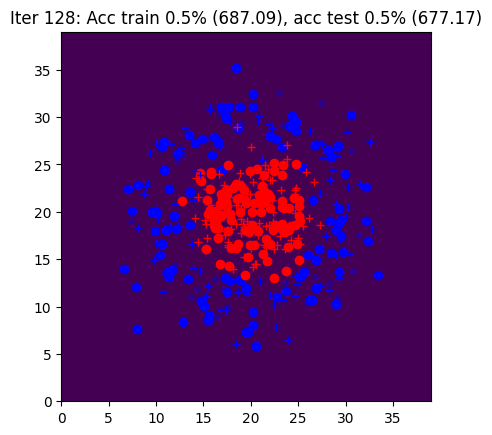

Iter 129: Acc train 0.6% (751.00), acc test 0.6% (757.06)


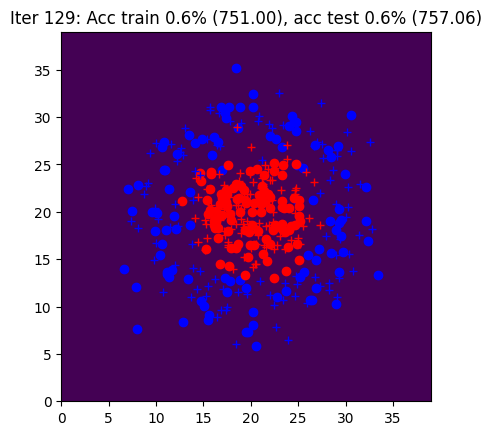

Iter 130: Acc train 0.5% (719.90), acc test 0.5% (734.34)


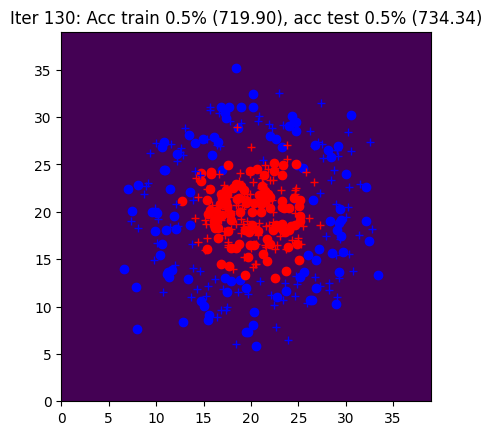

Iter 131: Acc train 0.4% (650.37), acc test 0.4% (650.26)


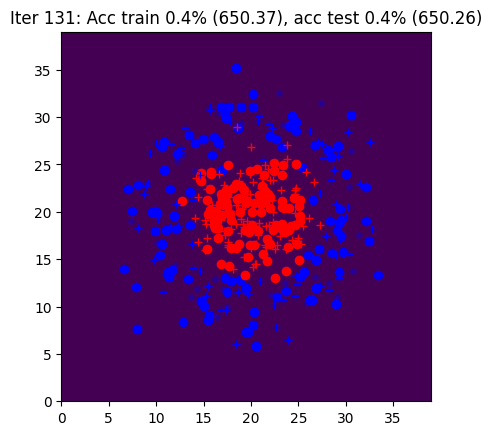

Iter 132: Acc train 0.6% (811.11), acc test 0.6% (814.48)


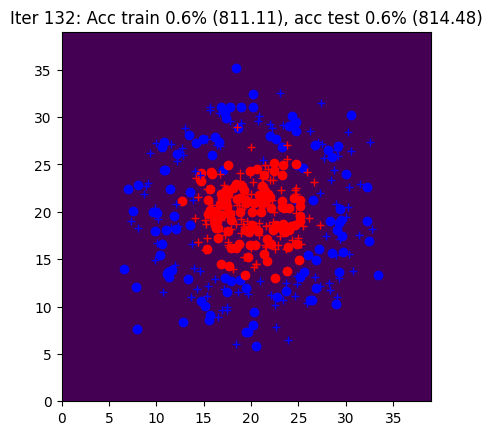

Iter 133: Acc train 0.6% (554.51), acc test 0.6% (553.65)


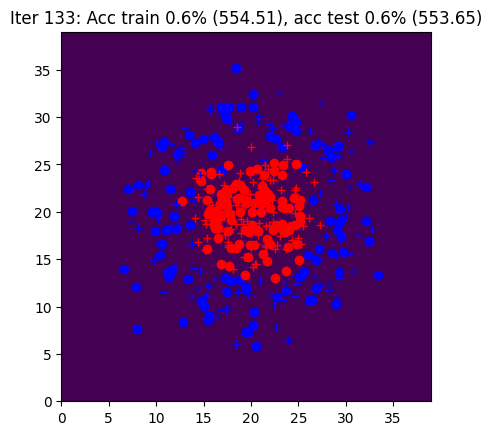

Iter 134: Acc train 0.5% (1099.46), acc test 0.4% (1022.95)


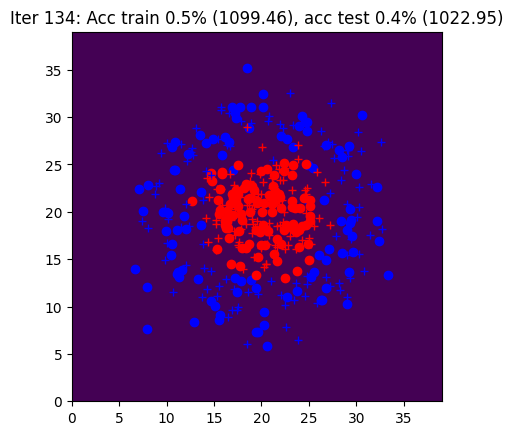

Iter 135: Acc train 0.5% (1173.48), acc test 0.4% (1092.24)


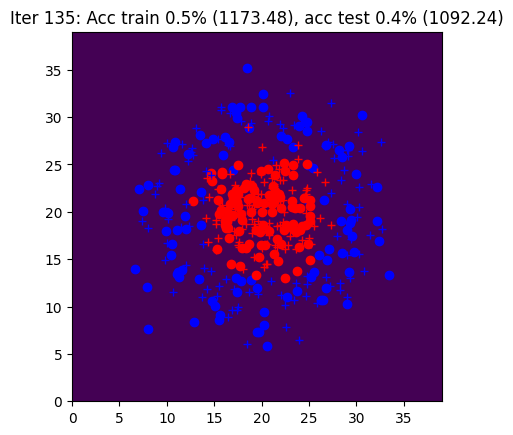

Iter 136: Acc train 0.6% (641.44), acc test 0.7% (641.21)


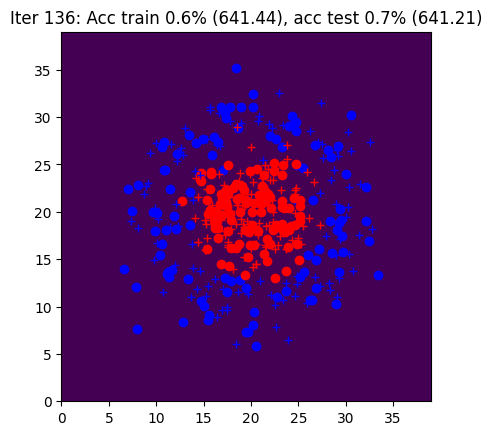

Iter 137: Acc train 0.5% (1044.77), acc test 0.5% (990.98)


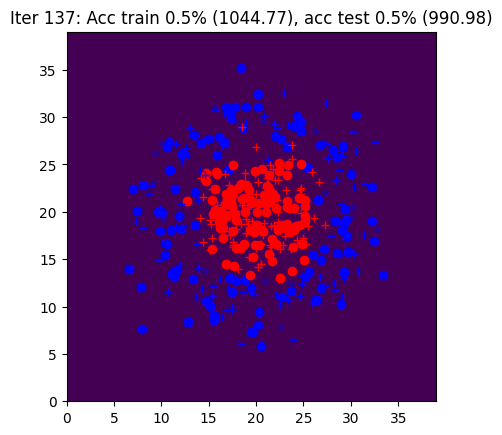

Iter 138: Acc train 0.6% (562.47), acc test 0.6% (561.52)


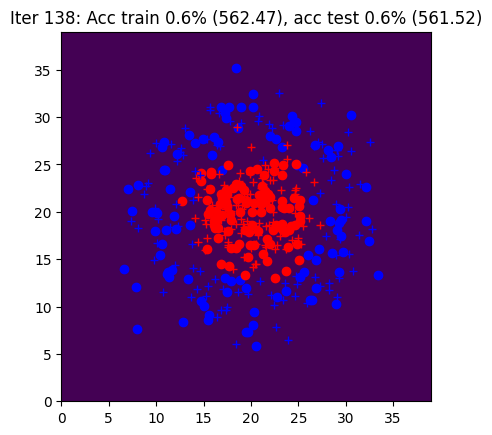

Iter 139: Acc train 0.6% (554.76), acc test 0.6% (553.41)


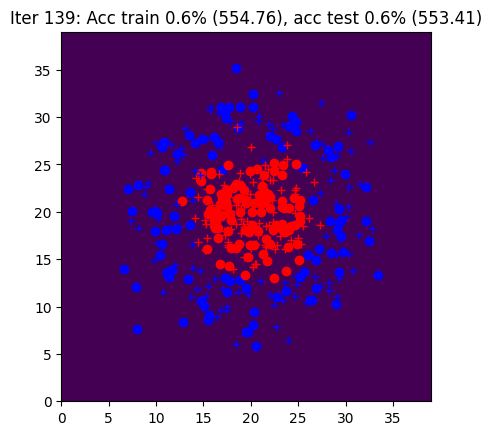

Iter 140: Acc train 0.4% (703.89), acc test 0.4% (714.41)


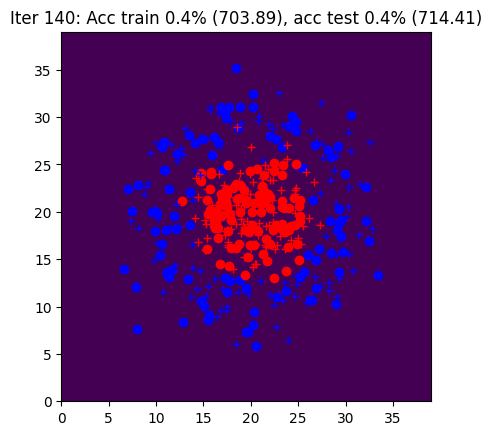

Iter 141: Acc train 0.6% (720.07), acc test 0.6% (719.07)


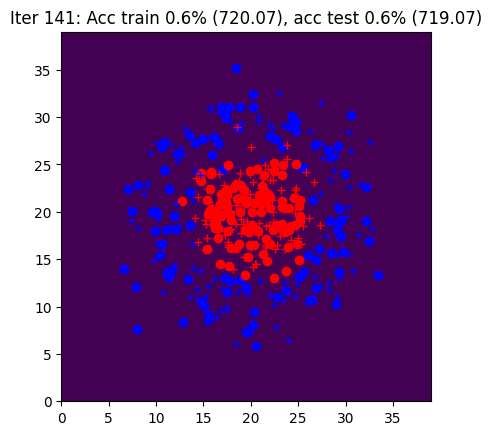

Iter 142: Acc train 0.4% (671.18), acc test 0.4% (675.23)


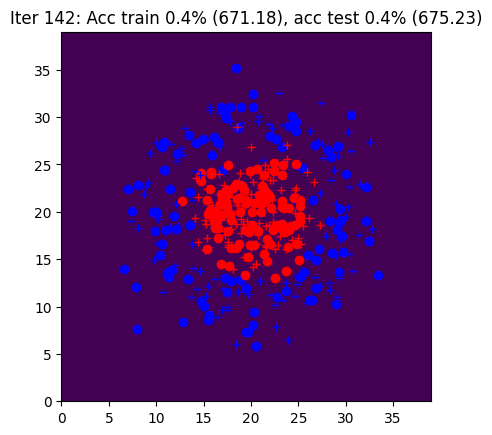

Iter 143: Acc train 0.4% (1016.86), acc test 0.4% (961.58)


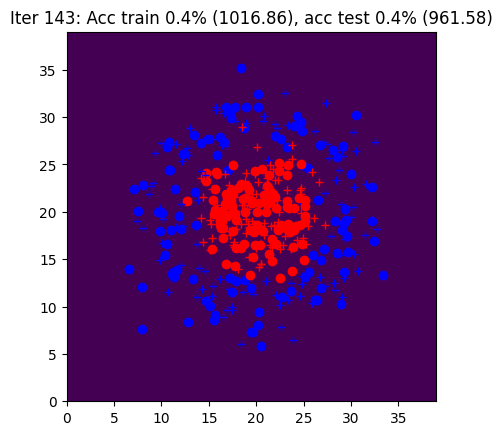

Iter 144: Acc train 0.6% (788.01), acc test 0.5% (808.53)


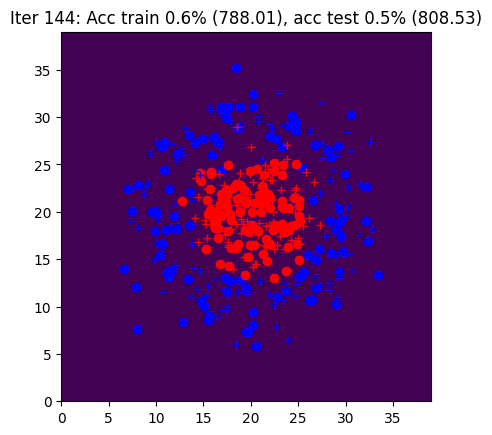

Iter 145: Acc train 0.4% (614.73), acc test 0.5% (618.62)


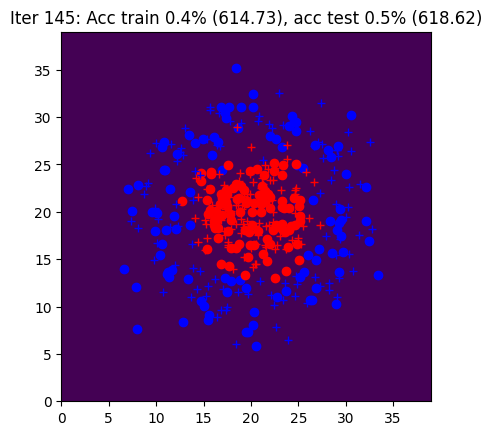

Iter 146: Acc train 0.4% (745.59), acc test 0.4% (753.54)


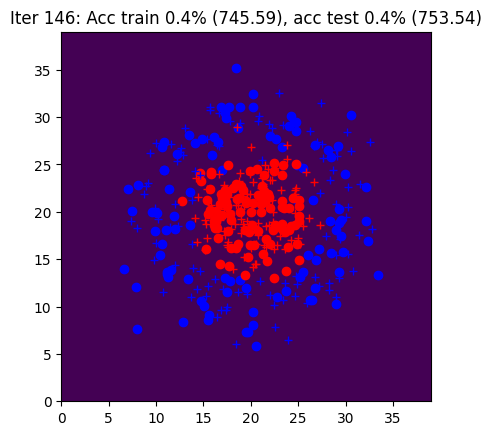

Iter 147: Acc train 0.6% (829.98), acc test 0.5% (852.24)


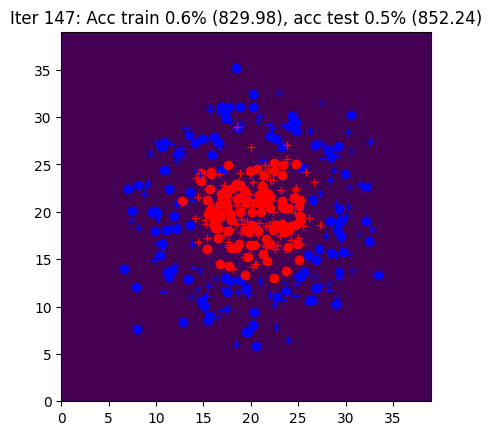

Iter 148: Acc train 0.4% (648.20), acc test 0.4% (643.99)


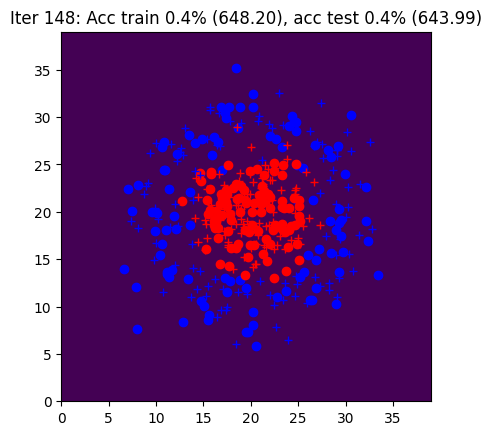

Iter 149: Acc train 0.6% (682.58), acc test 0.6% (680.33)


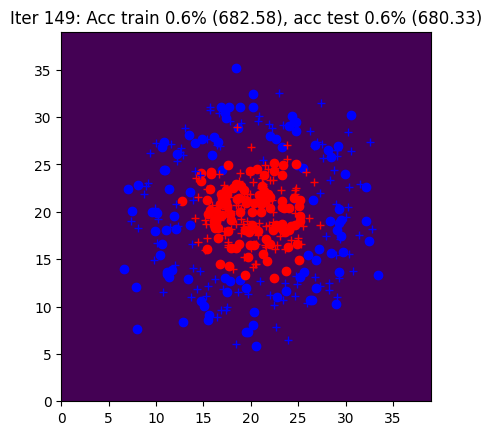

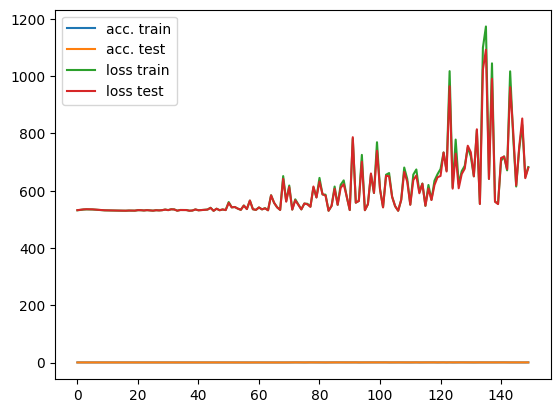

In [28]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

params = init_params(nx, nh, ny)

curves = [[], [], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code here  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j + 1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: forward, loss_accuracy, backward, sgd
        # Forward pass
        Yhat, outputs = forward(params, X)

        # Calculate loss and accuracy
        L, acc = loss_accuracy(Yhat, Y)

        # Backward pass
        grads = backward(params, outputs, Y)

        # Update parameters using SGD
        params = sgd(params, grads, eta)


    ####################
    ##      END        #
    ####################

    Yhat_train, _ = forward(params, data.Xtrain)
    Yhat_test, _ = forward(params, data.Xtest)
    Ltrain, acctrain = loss_accuracy(Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(Yhat_test, data.Ytest)
    Ygrid, _ = forward(params, data.Xgrid)

    title = "Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})".format(
        iteration, acctrain, Ltrain, acctest, Ltest
    )
    print(title)
    data.plot_data_with_grid(Ygrid, title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain)
    curves[3].append(Ltest)

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()


# Part 2 : Simplification of the backward pass with `torch.autograd`



In [ ]:
def init_params(nx, nh, ny):
    """
    nx, nh, ny: integers
    out params: dictionnary
    """
    params = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for Wh, Wy, bh, by
    # activaye autograd on the network weights

    # Initialize weights with a normal distribution
    params["Wh"] = torch.randn(nh, nx, requires_grad=True)
    params["Wy"] = torch.randn(ny, nh, requires_grad=True)
    
    # Initialize biases as zeros
    params["bh"] = torch.zeros(nh, requires_grad=True)
    params["by"] = torch.zeros(ny, requires_grad=True)

    ####################
    ##      END        #
    ####################
    return params


The function `forward` remains unchanged from previous part.

The function `backward` is no longer used because of "autograd".

In [ ]:
def sgd(params, eta):

    #####################
    ## Your code here  ##
    #####################
    # update the network weights
    # warning: use torch.no_grad()
    # and reset to zero the gradient accumulators

    params["Wh"] = None
    params["Wy"] = None
    params["bh"] = None
    params["by"] = None

    ####################
    ##      END        #
    ####################
    return params


## Global learning procedure with autograd

In [ ]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

params = init_params(nx, nh, ny)

curves = [[], [], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code here  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j + 1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: forward, loss_accuracy, sgd
        # and the backward function with autograd

    ####################
    ##      END        #
    ####################

    Yhat_train, _ = forward(params, data.Xtrain)
    Yhat_test, _ = forward(params, data.Xtest)
    Ltrain, acctrain = loss_accuracy(Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(Yhat_test, data.Ytest)
    Ygrid, _ = forward(params, data.Xgrid)

    title = "Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})".format(
        iteration, acctrain, Ltrain, acctest, Ltest
    )
    print(title)
    # detach() is used to remove the predictions from the computational graph in autograd
    data.plot_data_with_grid(Ygrid.detach(), title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain)
    curves[3].append(Ltest)

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()


# Part 3 : Simplification of the forward pass with `torch.nn`

`init_params` and `forward` are replaced by the `init_model` function which defines the network architecture and the loss.

In [ ]:
def init_model(nx, nh, ny):

    #####################
    ## Your code here  ##
    #####################

    model = None
    loss = None

    ####################
    ##      END        #
    ####################

    return model, loss


In [ ]:
def loss_accuracy(loss, Yhat, Y):

    #####################
    ## Your code here  ##
    #####################
    # call the loss function

    L = 0
    acc = 0

    ####################
    ##      END        #
    ####################

    return L, acc


In [ ]:
def sgd(model, eta):

    #####################
    ## Your code here  ##
    #####################
    # update the network weights
    # warning: use torch.no_grad()
    # and reset to zero the gradient accumulators

    ####################
    ##      END        #
    ####################
    return model


## Global learning procedure with autograd and `torch.nn`

In [ ]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

model, loss = init_model(nx, nh, ny)

curves = [[], [], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code here  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j + 1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: loss_accuracy, sgd
        # the forward with the predict method from the model
        # and the backward function with autograd

    ####################
    ##      END        #
    ####################

    Yhat_train = model(data.Xtrain)
    Yhat_test = model(data.Xtest)
    Ltrain, acctrain = loss_accuracy(loss, Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(loss, Yhat_test, data.Ytest)
    Ygrid = model(data.Xgrid)

    title = "Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})".format(
        iteration, acctrain, Ltrain, acctest, Ltest
    )
    print(title)
    data.plot_data_with_grid(torch.nn.Softmax(dim=1)(Ygrid.detach()), title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain)
    curves[3].append(Ltest)

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()


# Part 4 : Simplification of the SGD with `torch.optim`

In [ ]:
def init_model(nx, nh, ny, eta):

    #####################
    ## Your code here  ##
    #####################

    model = None
    loss = None
    optim = None

    ####################
    ##      END        #
    ####################

    return model, loss, optim


The `sgd` function is replaced by calling the `optim.zero_grad()` before the backward and `optim.step()` after.

## Algorithme global d'apprentissage (avec autograd, les couches `torch.nn` et `torch.optim`)

In [ ]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

model, loss, optim = init_model(nx, nh, ny, eta)

curves = [[], [], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code  here ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j + 1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: loss_accuracy
        # the forward with the predict method from the model
        # the backward function with autograd
        # and then an optimization step

    ####################
    ##      FIN        #
    ####################

    Yhat_train = model(data.Xtrain)
    Yhat_test = model(data.Xtest)
    Ltrain, acctrain = loss_accuracy(loss, Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(loss, Yhat_test, data.Ytest)
    Ygrid = model(data.Xgrid)

    title = "Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})".format(
        iteration, acctrain, Ltrain, acctest, Ltest
    )
    print(title)
    data.plot_data_with_grid(torch.nn.Softmax(dim=1)(Ygrid.detach()), title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain)
    curves[3].append(Ltest)

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()


# Part 5 : MNIST

Apply the code from previous part code to the MNIST dataset.

In [ ]:
# init
data = MNISTData()
N = data.Xtrain.shape[0]
Nbatch = 100
nx = data.Xtrain.shape[1]
nh = 100
ny = data.Ytrain.shape[1]
eta = 0.03


# Part 6: Bonus: SVM


Train a SVM model on the Circles dataset.

Ideas :
- First try a linear SVM (sklearn.svm.LinearSVC dans scikit-learn). Does it work well ? Why ?
- Then try more complex kernels (sklearn.svm.SVC). Which one is the best ? why ?
- Does the parameter C of regularization have an impact? Why ?

In [ ]:
# data
data = CirclesData()
Xtrain = data.Xtrain.numpy()
Ytrain = data.Ytrain[:, 0].numpy()

Xgrid = data.Xgrid.numpy()

Xtest = data.Xtest.numpy()
Ytest = data.Ytest[:, 0].numpy()


def plot_svm_predictions(data, predictions):
    plt.figure(2)
    plt.clf()
    plt.imshow(np.reshape(predictions, (40, 40)))
    plt.plot(
        data._Xtrain[data._Ytrain[:, 0] == 1, 0] * 10 + 20,
        data._Xtrain[data._Ytrain[:, 0] == 1, 1] * 10 + 20,
        "bo",
        label="Train",
    )
    plt.plot(
        data._Xtrain[data._Ytrain[:, 1] == 1, 0] * 10 + 20,
        data._Xtrain[data._Ytrain[:, 1] == 1, 1] * 10 + 20,
        "ro",
    )
    plt.plot(
        data._Xtest[data._Ytest[:, 0] == 1, 0] * 10 + 20,
        data._Xtest[data._Ytest[:, 0] == 1, 1] * 10 + 20,
        "b+",
        label="Test",
    )
    plt.plot(
        data._Xtest[data._Ytest[:, 1] == 1, 0] * 10 + 20,
        data._Xtest[data._Ytest[:, 1] == 1, 1] * 10 + 20,
        "r+",
    )
    plt.xlim(0, 39)
    plt.ylim(0, 39)
    plt.clim(0.3, 0.7)
    plt.draw()
    plt.pause(1e-3)


In [ ]:
import sklearn.svm

############################
### Your code here   #######
### Train the SVM    #######
## See https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
## and https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
############################

svm = None

###########################


In [ ]:
## Print results

Ytest_pred = svm.predict(Xtest)
accuracy = np.sum(Ytest == Ytest_pred) / len(Ytest)
print(f"Accuracy : {100 * accuracy:.2f}")
Ygrid_pred = svm.predict(Xgrid)
plot_svm_predictions(data, Ygrid_pred)
